In [ ]:
# importing libraries

# general purpose libraries
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
# for statical analysis
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for preprocessing
from sklearn.preprocessing import StandardScaler , LabelEncoder

# for train test split
from sklearn.model_selection import train_test_split

# for oversampling
from imblearn.over_sampling import SMOTE

# for models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# for evaluation
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , recall_score , precision_score , f1_score

%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [ ]:
# load the dataset
df = pd.read_csv('/content/sample_data/weatherAUS.csv')

# preview the dataset
df.head()

#Column Descriptions:
#Table of Contents

Date
Description: The date of observation.
Format: YYYY-MM-DD.

Location
Description: The common name of the location of the weather station.

MinTemp
Description: The minimum temperature recorded in degrees Celsius.

MaxTemp
Description: The maximum temperature recorded in degrees Celsius.

Rainfall
Description: The amount of rainfall recorded for the day in millimeters.

Evaporation
Description: The Class A pan evaporation in millimeters in the 24 hours to 9 AM.

Sunshine
Description: The number of hours of bright sunshine during the day.

WindGustDir
Description: The direction of the strongest wind gust in the 24 hours to midnight.


WindGustSpeed

Description: The speed of the strongest wind gust in kilometers per hour in the 24 hours to midnight.
WindDir9am

Description: The direction of the wind at 9 AM.
WindDir3pm

Description: The direction of the wind at 3 PM.
WindSpeed9am

Description: Wind speed averaged over 10 minutes prior to 9 AM in kilometers per hour.
WindSpeed3pm

Description: Wind speed averaged over 10 minutes prior to 3 PM in kilometers per hour.
Humidity9am

Description: Humidity percentage at 9 AM.
Humidity3pm

Description: Humidity percentage at 3 PM.
Pressure9am

Description: Atmospheric pressure reduced to mean sea level at 9 AM in hectopascals (hPa).
Pressure3pm
Description: Atmospheric pressure reduced to mean sea level at 3 PM in hectopascals (hPa).
Cloud9am

Description: Fraction of the sky obscured by cloud at 9 AM, measured in oktas (eighths). A value of 0 indicates a completely clear sky, while a value of 8 indicates completely overcast conditions.
Cloud3pm

Description: Fraction of the sky obscured by cloud at 3 PM, measured in oktas (eighths). See Cloud9am for a description of the values.
Temp9am

Description: Temperature at 9 AM in degrees Celsius.
Temp3pm

Description: Temperature at 3 PM in degrees Celsius.
RainToday

Description: Boolean indicator (1 if precipitation in the 24 hours to 9 AM exceeds 1 mm, otherwise 0).
RainTomorrow

Description: The amount of rainfall the next day in millimeters. Used to create the response variable RainTomorrow, indicating the "risk" of rain.

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
# check for the exact column names
df.columns

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

In [ ]:
# checking the shape of the dataset

print(f'The no. of rows in dataset is {df.shape[0]} \n  The no. of columns are {df.shape[1]}')



In [ ]:
# checking data types of columns
df.dtypes

In [ ]:
# checking test statistics of numeric columns
df.select_dtypes(exclude='object').describe().T

#Handling missing value

In [13]:
# check for missing values

df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

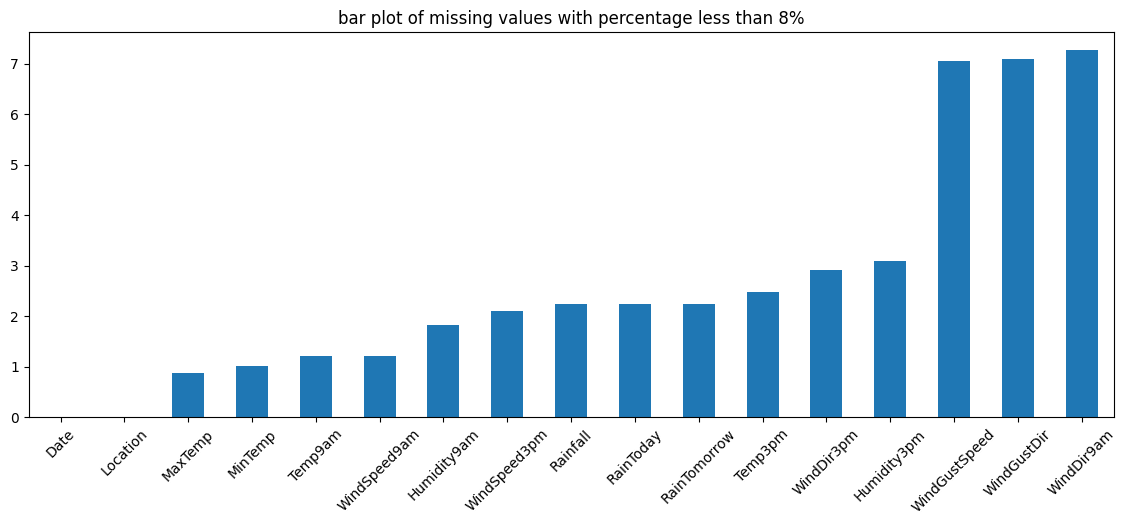

In [14]:
# plotting missing values

# setting up the figure
plt.figure(figsize=(14,5))
# calculating the percentage of missing values
missing = df.isnull().sum() / df.shape[0] *100
# plotting the bar plot of missing values with percentage less than 8%
missing = missing[missing < 8].sort_values().plot.bar()
# rotating the x axis labels
plt.xticks(rotation=45)
# setting up the title
plt.title('bar plot of missing values with percentage less than 8%')
plt.show()

#Imputing missing values

In [15]:
continuous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [16]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [17]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [18]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [19]:
categorical_feature

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [20]:


for feature in categorical_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        mode_nan(df,feature)


In [21]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

#Description of above Steps:
In the above code, snipet we filled the missing values in the dataset by using a unique startegy:
We impute missing values according to the unique enteries of the Location colun.
For the numeric column we calculate the median of the column where values are missing by using the unique enteries of the Location column and then fill the missing values with the median.
Same approach is used for the object column. We calculate the mode of the column where values are missing by using the unique enteries of the Location column and then fill the missing values with the mode.

In [22]:
# prompt: find the percentage of null values in each column

# Calculate the percentage of null values in each column
null_percentages = df.isnull().sum() / df.shape[0] * 100

# Print the results
print(null_percentages)


Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64


#Observation:
Still we have left with some missing values in the dataset.
These missing values cannot be filled with the above mentioned imputation method.
Becasue these above listed missing values are not collected for the specific location
Hence, we cannot impute these missing values with mean or median of the whole dataset as every city in Location column has its own demographical weather conditions

In [23]:
# confirming the outcome
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#Feature Engineering

In [24]:
# checking the data type of Date column

print(f'The data type of Date column is {df.Date.dtype}')

The data type of Date column is object


In [25]:
#Converting the data type of Date column to datetime
# converting the data type of Date column to datetime
df['Date'] = pd.to_datetime(df['Date'] )

In [26]:
# Feature extraction from Date

# extracting day, month and year from Date and creating new columns

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
# dropping the Date column
df.drop(['Date'] , axis=1 , inplace=True)

In [27]:
# checking the column names
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

In [28]:
# checking the first 5 rows
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.8       8.4           W   
1   Albury      7.4     25.1       0.0          4.8       8.4         WNW   
2   Albury     12.9     25.7       0.0          4.8       8.4         WSW   
3   Albury      9.2     28.0       0.0          4.8       8.4          NE   
4   Albury     17.5     32.3       1.0          4.8       8.4           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       7.0   
1           44.0        NNW        WSW  ...       1007.8       7.0       7.0   
2           46.0          W        WSW  ...       1008.7       7.0       2.0   
3           24.0         SE          E  ...       1012.8       7.0       7.0   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 25 columns]

In [29]:
# check for the count of unique values in each column

df.nunique().sort_values(ascending=True)

RainTomorrow       2
RainToday          2
Cloud3pm          10
Cloud9am          10
year              11
month             12
WindGustDir       16
WindDir9am        16
WindDir3pm        16
day               31
WindSpeed9am      43
WindSpeed3pm      44
Location          49
WindGustSpeed     67
Humidity3pm      101
Humidity9am      101
Sunshine         145
Evaporation      358
MinTemp          389
Temp9am          441
Temp3pm          502
MaxTemp          505
Pressure9am      546
Pressure3pm      549
Rainfall         681
dtype: int64

In [30]:
#Duplicate rows
# checking for duplicate rows
print("duplicate rows = " ,df.duplicated().sum())

duplicate rows =  0


#Observation:
There are no duplicate rows in our dataset

In [31]:
# checking the unique values of year
df.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007],
      dtype=int32)

In [32]:
# checking the count of each year
df.year.value_counts().sort_index()

year
2007       61
2008     2270
2009    16789
2010    16782
2011    15407
2012    15409
2013    16415
2014    17885
2015    17885
2016    17934
2017     8623
Name: count, dtype: int64

In [33]:
# checking the unique values of Location
df.Location.nunique()

49

In [34]:
# checking the unique enteries of Location column
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [35]:
# checking the count of each Location

df.Location.value_counts().sort_index()

Location
Adelaide            3193
Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale                3009
SalmonGums          3001
Sydney              3344
SydneyAirport       3009
Townsville          3040
Tuggeranong         3039
Uluru               1578
WaggaWagga          3009
Walpole             3006
Watsonia            3009
Williamtown         3009
Witchcliffe         3009
Wollongong          3040
Woomera             3009
Name: count, dtype: int64

#Observation:
The data is collected from the 49 cities of Australia over the period of 11 years which starts from 2007 to 2017.

In [36]:
# Location with lowest MinTemp
df.groupby(['Location' , 'year' , 'month'])['MinTemp'].min().sort_values(ascending=True).head()

Location     year  month
MountGinini  2009  6       -8.5
Tuggeranong  2011  7       -8.2
MountGinini  2015  8       -8.2
Canberra     2011  7       -8.0
MountGinini  2010  6       -8.0
Name: MinTemp, dtype: float64

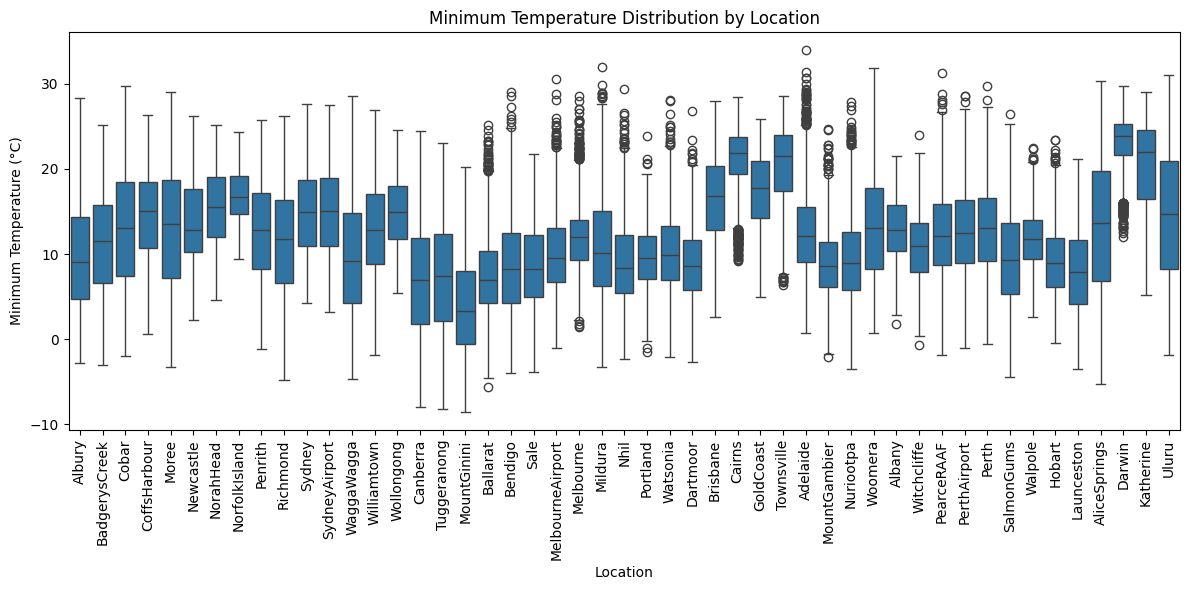

In [37]:


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='MinTemp', data=df)
plt.xticks(rotation=90)
plt.title('Minimum Temperature Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Minimum Temperature (°C)')
plt.tight_layout()
plt.show()


In [38]:
# describing the MinTemp
df['MinTemp'].describe()

count    145460.000000
mean         12.192053
std           6.365780
min          -8.500000
25%           7.700000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

In [39]:
# Location with avg MinTemp

# calculating the mean of MinTemp
mean_MinTemp = df['MinTemp'].mean()

# Location with avg MinTemp
df.loc[df['MinTemp'] == mean_MinTemp.round(1)][['MinTemp' , 'Location',  'year' , 'month']].sort_values( by='Location')

MinTemp  Location  year  month
96580      12.2  Adelaide  2009      3
96414      12.2  Adelaide  2008     10
96448      12.2  Adelaide  2008     11
96842      12.2  Adelaide  2009     12
97119      12.2  Adelaide  2010      9
...         ...       ...   ...    ...
105993     12.2   Woomera  2010      3
105802     12.2   Woomera  2009      8
105753     12.2   Woomera  2009      7
107393     12.2   Woomera  2014      4
107571     12.2   Woomera  2014      9

[820 rows x 4 columns]


Observation:¶


Average MinTemp is 12.192053


The range of MinTemp lies between -8.500000 to 33.900000


MountGinini is the coldest city in Australia with MinTemp of -8.5

#Getting info from MaxTemp column

In [40]:
#  test statistics of MaxTemp

df.MaxTemp.describe()

count    145460.000000
mean         23.215962
std           7.088358
min          -4.800000
25%          18.000000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

In [41]:
# count of the unique values in MaxTemp

df.MaxTemp.nunique()

505

In [42]:
# Location with highest MaxTemp

# Group by 'Location', 'year', 'month' and calculate the mean or another aggregation function for 'MaxTemp'
grouped_df = df.groupby(['Location', 'year', 'month'])['MaxTemp'].max().reset_index()

# Sort the resulting DataFrame by 'MaxTemp' in descending order
grouped_df.sort_values(by='MaxTemp', ascending=False).head()

Location  year  month  MaxTemp
4711   Woomera  2011      1     48.1
2178     Moree  2017      2     47.3
2141     Moree  2014      1     47.3
3428  Richmond  2017      2     47.0
3026   Penrith  2017      2     46.9

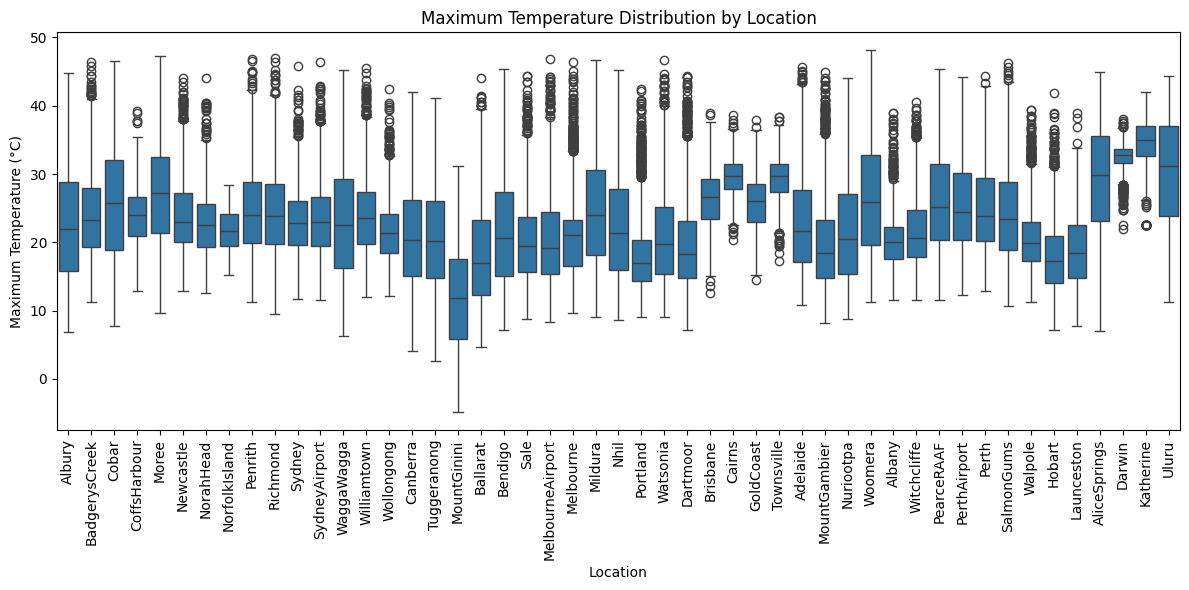

In [43]:


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='MaxTemp', data=df)
plt.xticks(rotation=90)
plt.title('Maximum Temperature Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Maximum Temperature (°C)')
plt.tight_layout()
plt.show()


#Observations:
According to the test statistics, the rane of MaxTemp lies in between 4.1 to 48.1
And, there are 400 unique values in MaxTemp
Woomera is the hottest city in Australia with the MaxTemp of 48.1 in 2011

#Getting info from Rainfall column

In [44]:
# test statistics of Rainfall
df.Rainfall.describe()

count    145460.000000
mean          2.307990
std           8.389771
min           0.000000
25%           0.000000
50%           0.000000
75%           0.600000
max         371.000000
Name: Rainfall, dtype: float64

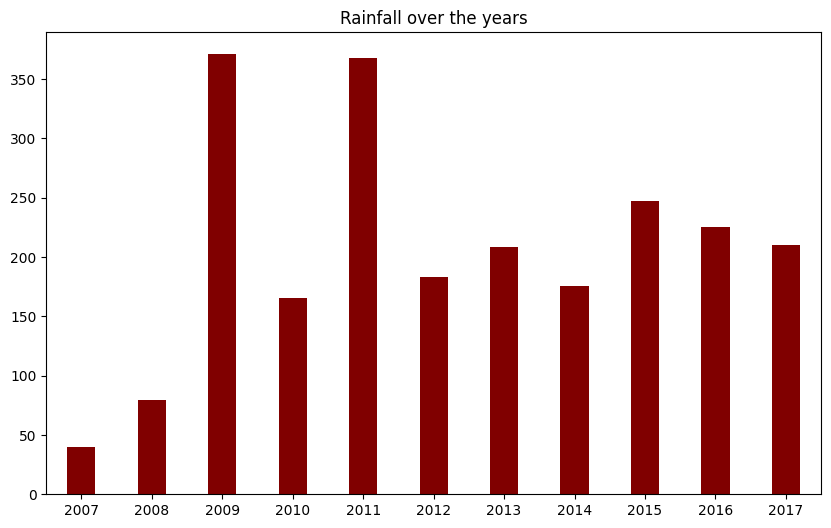

In [45]:
# defining the figure size
plt.figure(figsize=(10,6))
# plotting the graph
plt.bar(df.year, df.Rainfall , color ='maroon', width = 0.4)
# Set x-axis limits
plt.xlim(2007-0.5, 2017+0.5)

# Set x-tick labels, creating ticks for each year between 2007 and 2017
plt.xticks(np.arange(2007, 2018, 1))

#plt.show()
plt.title("Rainfall over the years")

plt.show()

In [46]:
#Location with highest Rainfall
# Find the maximum rainfall value
max_rainfall = df['Rainfall'].max()

# Filter the DataFrame to get the location(s) with the maximum rainfall
df[df['Rainfall'] == max_rainfall][['Location' , 'Rainfall' , 'year', 'month']]

Location  Rainfall  year  month
9368  CoffsHarbour     371.0  2009     11

#Observation:
Average Rainfall for the period when data is collected is 2.37 mm
Darwin experience is highest amount of Rainfall in 2nd month of 2011 which recorded as 367.6 mm
Data shows highest Rainfall occured in 2011 followed by 2009 and 2015.

#EDA

In [47]:
px.histogram(df, x='Location', color=df['RainToday'], title="Location vs Rainy days")

In [48]:
px.histogram(df, x='Temp3pm', color=df['RainTomorrow'], title="Temperature at 3 pm vs Rain tomorrow")

In [49]:
px.histogram(df, x='RainTomorrow', color=df["RainToday"], title="RainToday vs RainTomorrow")

In [50]:
px.scatter(df.sample(2000), title="Min vs Max temperatures", x='MinTemp', y='MaxTemp', color="RainToday")

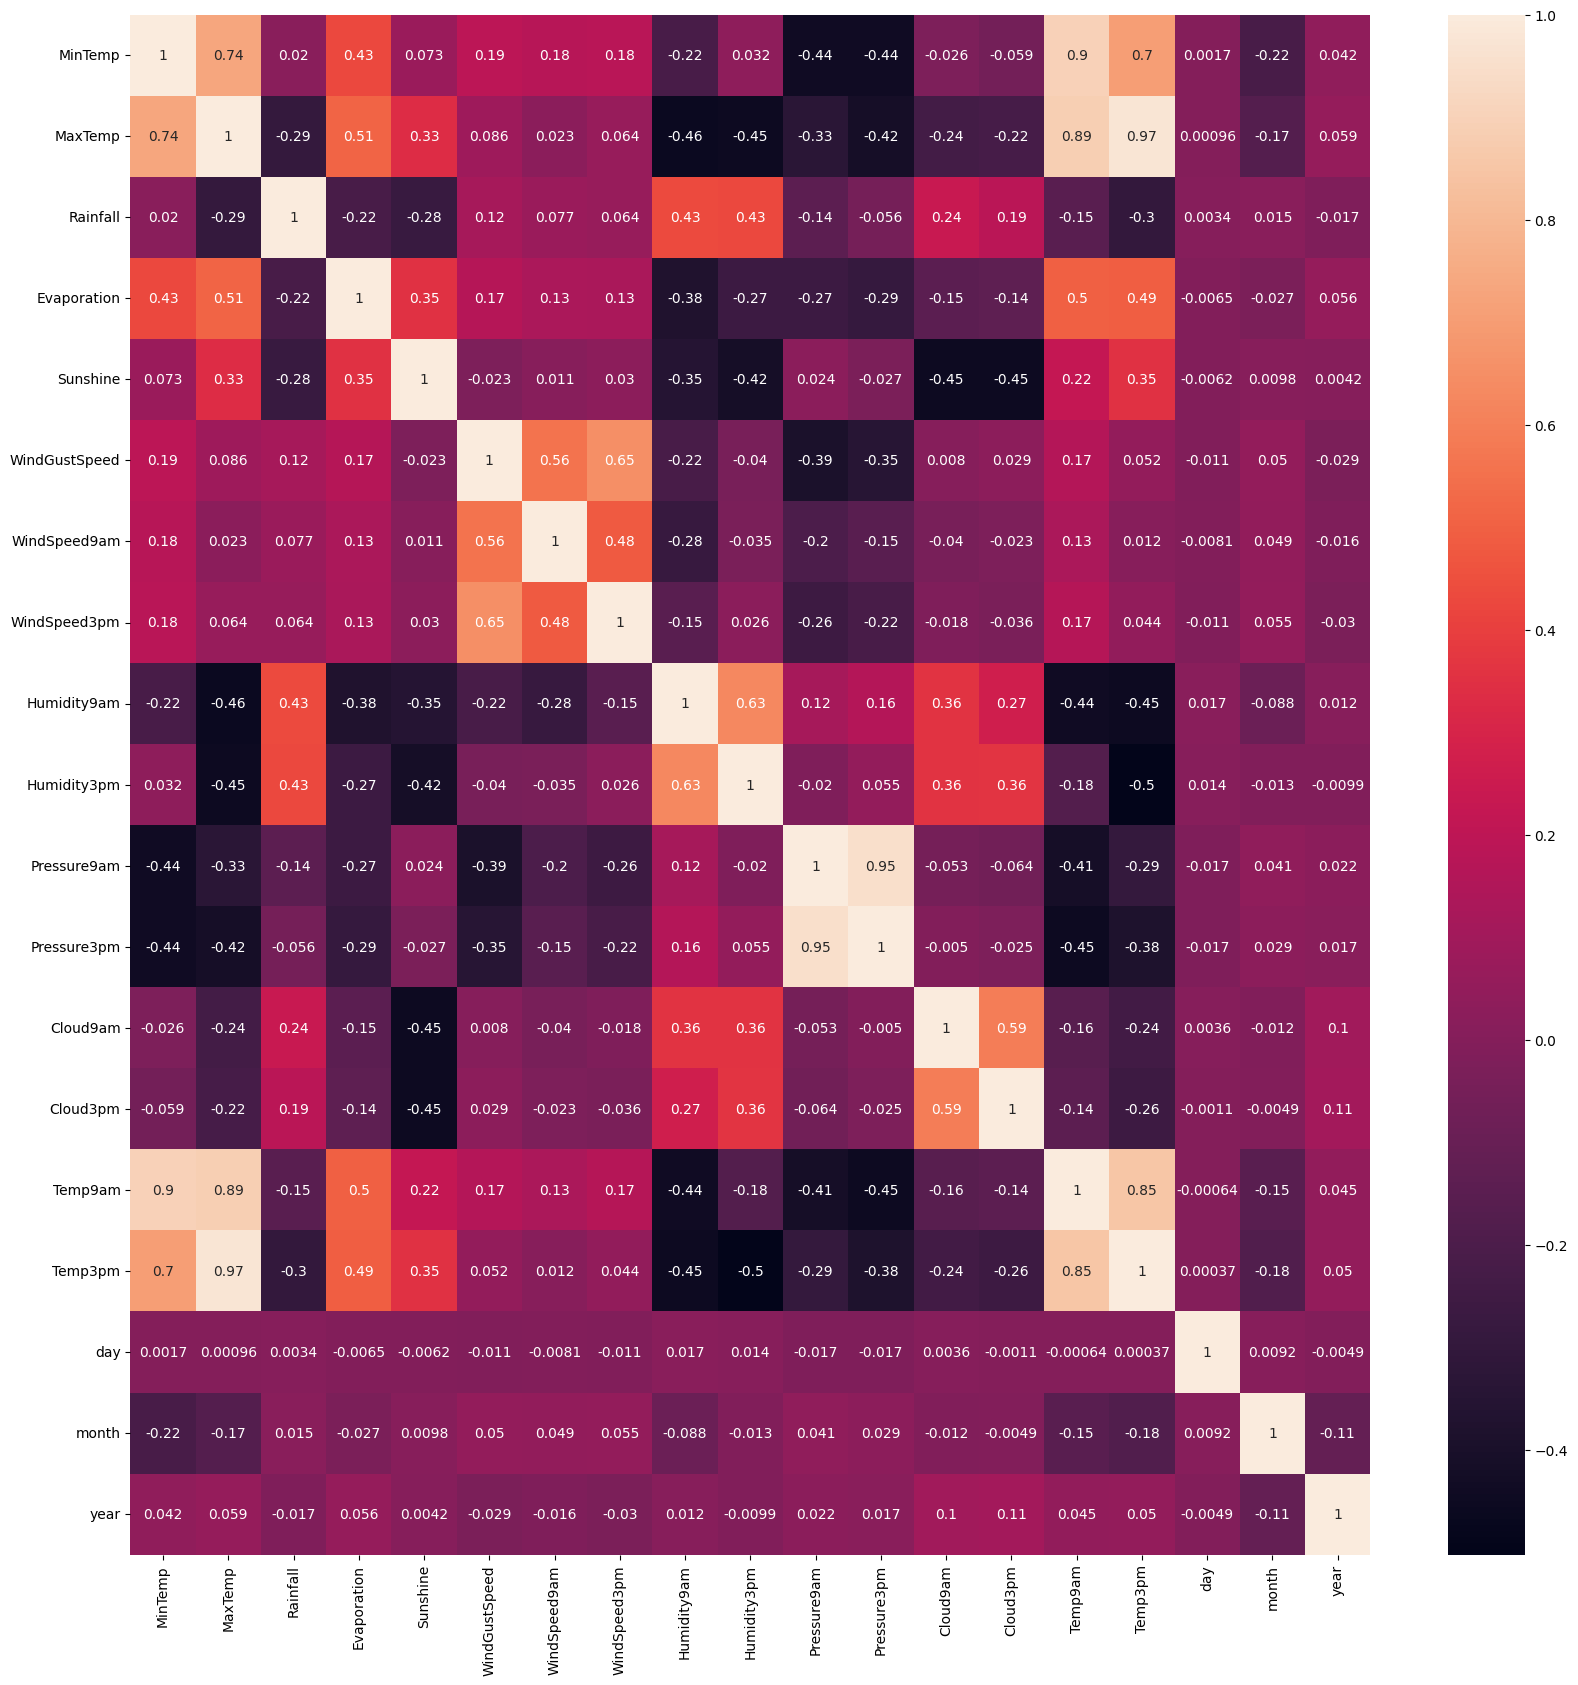

In [51]:
corrmat = df.corr(method="spearman", numeric_only=True)  # Calculate correlation only for numerical columns
plt.figure(figsize=(20, 20))
# plot heat map
g = sns.heatmap(corrmat, annot=True)

#Key Observations

###Strong Positive Correlations:

MinTemp and Temp9am (0.91), MinTemp and Temp3pm (0.74): Higher minimum temperatures are associated with higher temperatures at 9am and 3pm.
MaxTemp and Temp3pm (0.99): Higher maximum temperatures are strongly correlated with higher temperatures at 3pm.
Humidity9am and Humidity3pm (0.66): Morning humidity is positively correlated with afternoon humidity.
Pressure9am and Pressure3pm (0.96): Morning pressure is highly correlated with afternoon pressure.


###Strong Negative Correlations:

Sunshine and Cloud9am (-0.58), Sunshine and Cloud3pm (-0.65): More sunshine is associated with fewer clouds in the morning and afternoon.
Pressure9am and Cloud3pm (-0.45), Pressure3pm and Cloud3pm (-0.46): Higher pressure is associated with fewer clouds in the afternoon.


###Moderate Correlations:

MaxTemp and Sunshine (0.45): Higher maximum temperatures are moderately correlated with more sunshine.
Evaporation and Sunshine (0.55): More sunshine is associated with higher evaporation rates.
WindGustSpeed and WindSpeed9am (0.57), WindGustSpeed and WindSpeed3pm (0.44): Higher gust speeds are correlated with higher wind speeds in the morning and afternoon.


###Low or No Correlations:

Variables such as day, month, and year show very low or no correlation with most of the weather variables, indicating that these temporal variables do not have a strong linear relationship with the weather parameters in this dataset.
Interpretation of Specific Relationships
Temperature Relationships: Temperatures at different times of the day are highly correlated, indicating consistent temperature patterns throughout the day.
Sunshine and Cloud Cover: As expected, more sunshine is associated with fewer clouds, indicating clear skies.
Pressure and Cloud Cover: Higher pressure is associated with fewer clouds, which is typical as high-pressure systems are often associated with clear weather.
###Conclusion
The heatmap provides a visual representation of how various weather variables are interrelated. Understanding these correlations can be useful for weather forecasting and studying weather patterns. The strong positive and negative correlations highlight key relationships, such as those between temperature and time of day, sunshine and cloud cover, and pressure and cloud cover.








In [52]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.8       8.4           W   
1   Albury      7.4     25.1       0.0          4.8       8.4         WNW   
2   Albury     12.9     25.7       0.0          4.8       8.4         WSW   
3   Albury      9.2     28.0       0.0          4.8       8.4          NE   
4   Albury     17.5     32.3       1.0          4.8       8.4           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       7.0   
1           44.0        NNW        WSW  ...       1007.8       7.0       7.0   
2           46.0          W        WSW  ...       1008.7       7.0       2.0   
3           24.0         SE          E  ...       1012.8       7.0       7.0   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 25 columns]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [54]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.8       8.4           W   
1   Albury      7.4     25.1       0.0          4.8       8.4         WNW   
2   Albury     12.9     25.7       0.0          4.8       8.4         WSW   
3   Albury      9.2     28.0       0.0          4.8       8.4          NE   
4   Albury     17.5     32.3       1.0          4.8       8.4           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       7.0   
1           44.0        NNW        WSW  ...       1007.8       7.0       7.0   
2           46.0          W        WSW  ...       1008.7       7.0       2.0   
3           24.0         SE          E  ...       1012.8       7.0       7.0   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 25 columns]

In [55]:
# prompt: find out categorical variables

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(categorical_features)


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#Checking for outliers by using boxplot

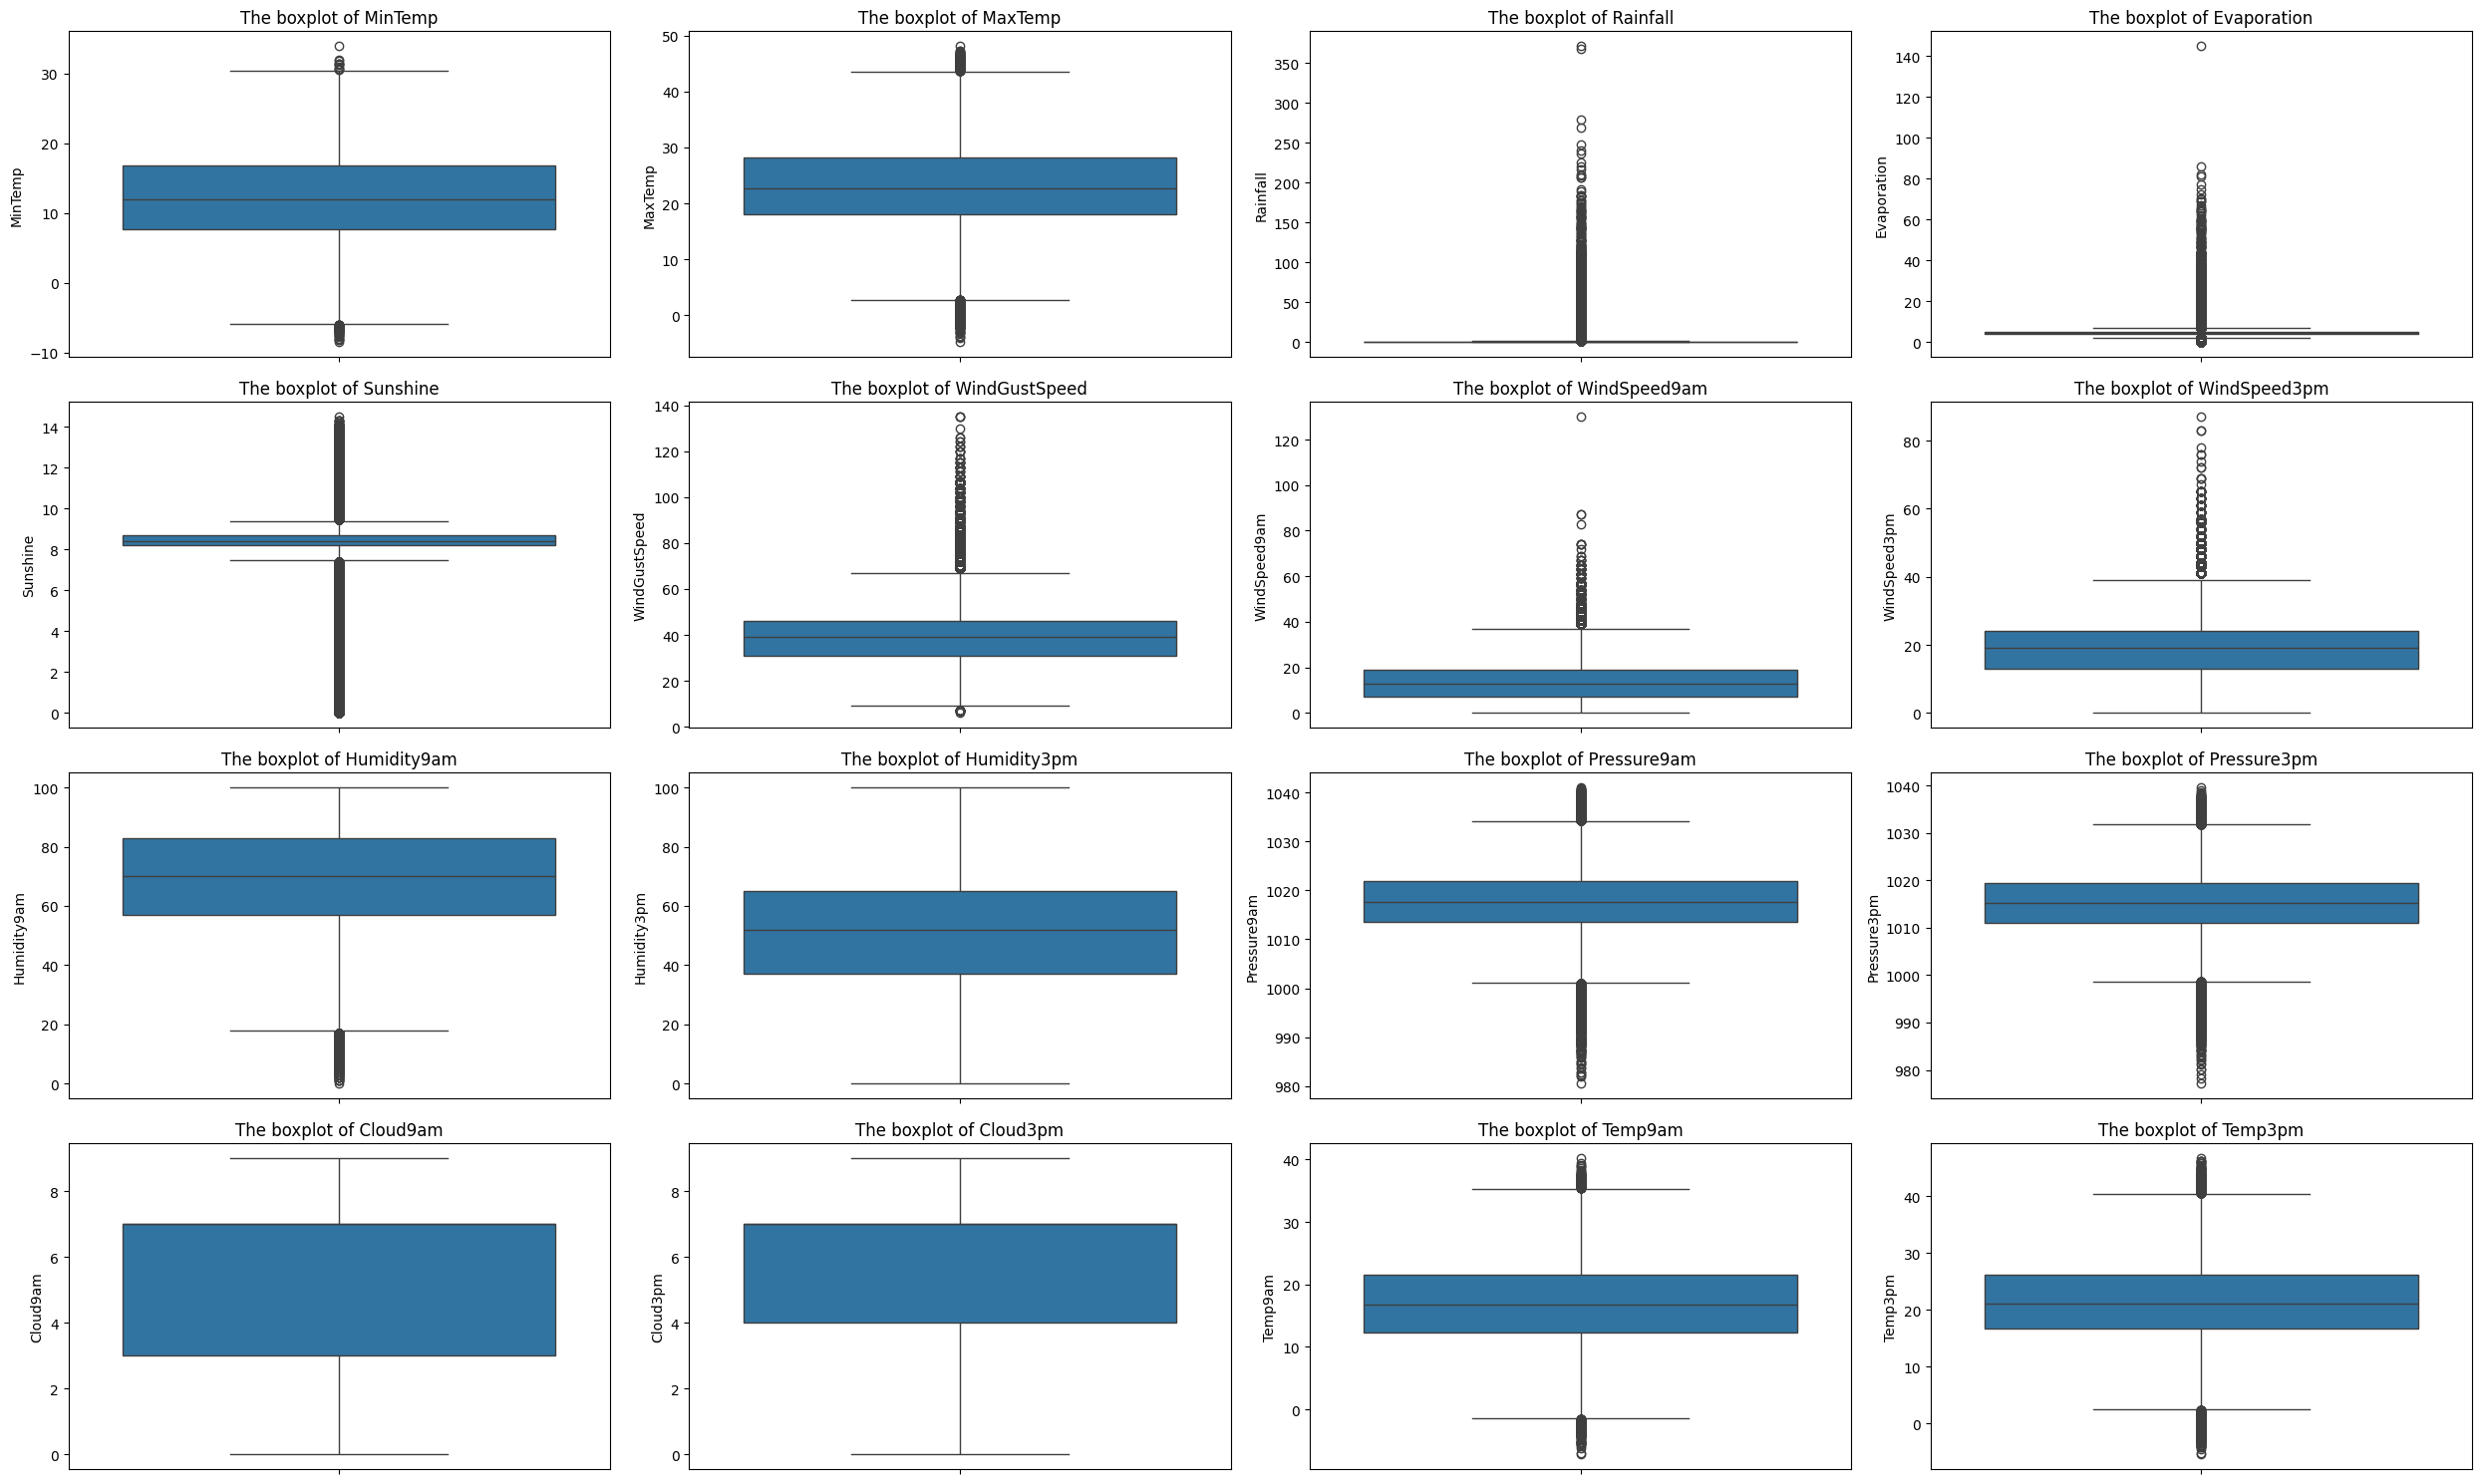

In [56]:
# Select numeric columns excluding 'object' and 'int32'
numeric_cols = df.select_dtypes(exclude=['object', 'int32']).columns

# defining the figure size
plt.figure(figsize=(25, 15))

# making for loop for subplots
for column in range(len(numeric_cols)):
    plt.subplot(4, 4, column+1)
    # plotting boxplot
    sns.boxplot(y=df[numeric_cols[column]])
    # defining column name for as title for each boxplot
    plt.title(f'The boxplot of {numeric_cols[column]}')
# adjusting the spacing between subplots
plt.tight_layout()
plt.show()

#Observation:
Columns like MaxTemp , Rainfall , Evaporation , WindGustSpeed , WindSpeed9am , WindSpeed3pm , Humidity9am , Pressure3pm , Pressure9am , Temp9am , Temp3pm have outliers.
Foe dealing these outliers we will use IQR (Interquantile range)

In [57]:
# List of columns to check data types
col = ['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Pressure9am', 'Temp9am', 'Temp3pm']

for i in col:
    print(f"{i}: {df[i].dtype}")
    print(f"{i}: {df[i].dtype}")

MaxTemp: float64
MaxTemp: float64
Rainfall: float64
Rainfall: float64
Evaporation: float64
Evaporation: float64
WindGustSpeed: float64
WindGustSpeed: float64
WindSpeed9am: float64
WindSpeed9am: float64
WindSpeed3pm: float64
WindSpeed3pm: float64
Humidity9am: float64
Humidity9am: float64
Pressure3pm: float64
Pressure3pm: float64
Pressure9am: float64
Pressure9am: float64
Temp9am: float64
Temp9am: float64
Temp3pm: float64
Temp3pm: float64


#Replacing outliers with median by using IQR

In [58]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.950000000000002 30.450000000000003


In [59]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [60]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.700000000000001 43.5


In [61]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [62]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.8999999999999999 1.5


In [63]:

df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [64]:

IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.1999999999999997 7.0


In [65]:
df.loc[df['Evaporation']>=7,'Evaporation']=7
df.loc[df['Evaporation']<=2.1999999999999997,'Evaporation']=2.1999999999999997

In [66]:

IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [67]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [68]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [69]:

df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [70]:

IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [71]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [72]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [73]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [74]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.0500000000001 1034.25


In [75]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [76]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

998.6500000000001 1031.85


In [77]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [78]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [79]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [80]:

IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.4499999999999993 40.45


In [81]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

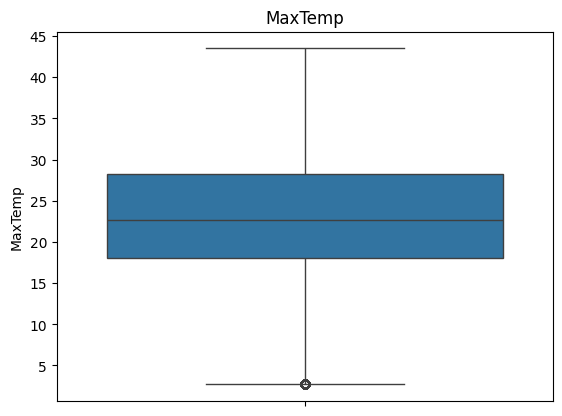

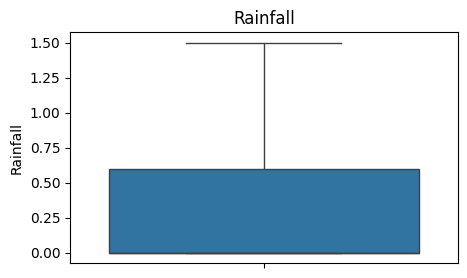

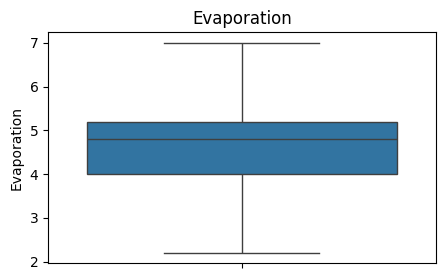

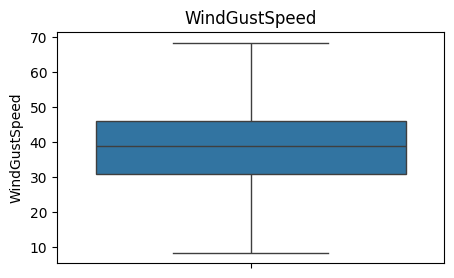

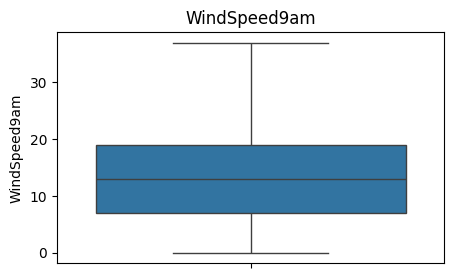

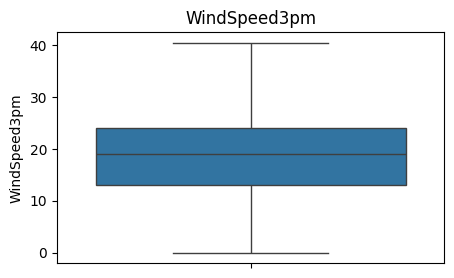

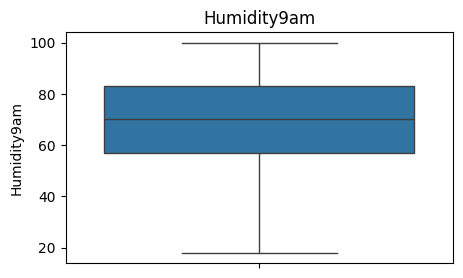

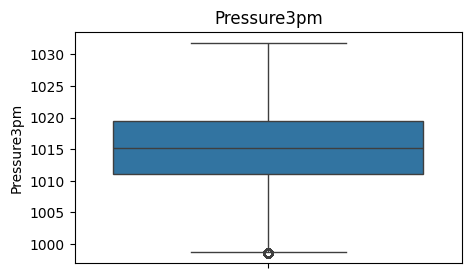

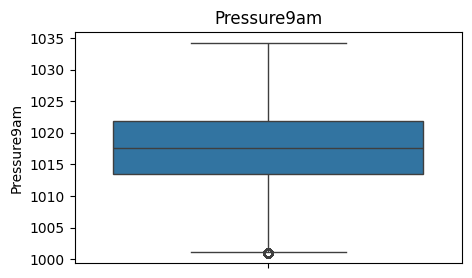

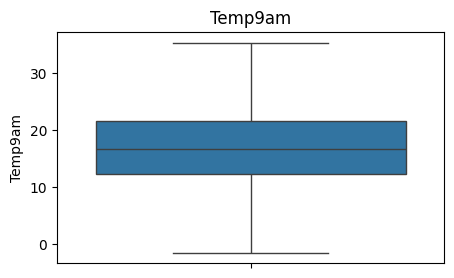

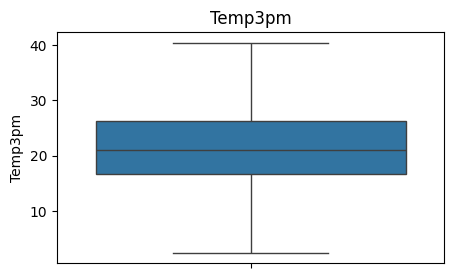

<Figure size 500x300 with 0 Axes>

In [82]:
for feature in col:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(5,3))

#Label encoding object columns

In [83]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.8       8.4           W   
1   Albury      7.4     25.1       0.0          4.8       8.4         WNW   
2   Albury     12.9     25.7       0.0          4.8       8.4         WSW   
3   Albury      9.2     28.0       0.0          4.8       8.4          NE   
4   Albury     17.5     32.3       1.0          4.8       8.4           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       7.0   
1           44.0        NNW        WSW  ...       1007.8       7.0       7.0   
2           46.0          W        WSW  ...       1008.7       7.0       2.0   
3           24.0         SE          E  ...       1012.8       7.0       7.0   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 25 columns]

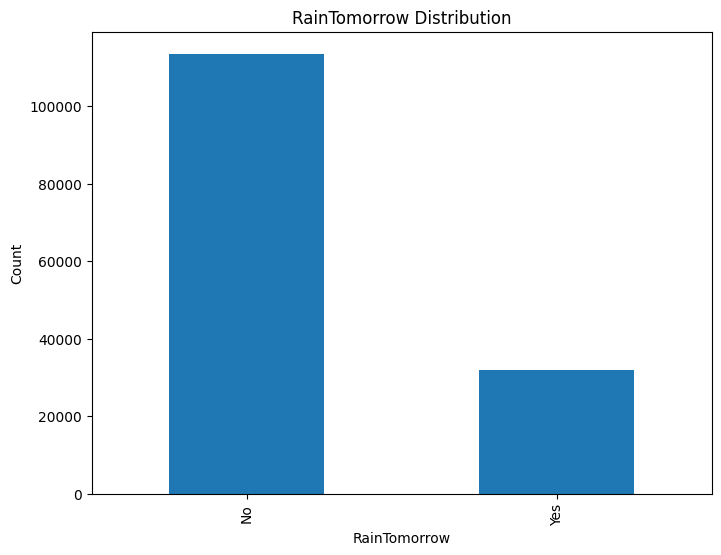

In [84]:
# prompt: create a barplot for raintommorow column

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
df['RainTomorrow'].value_counts().plot(kind='bar')
plt.title('RainTomorrow Distribution')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.show()


In [85]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


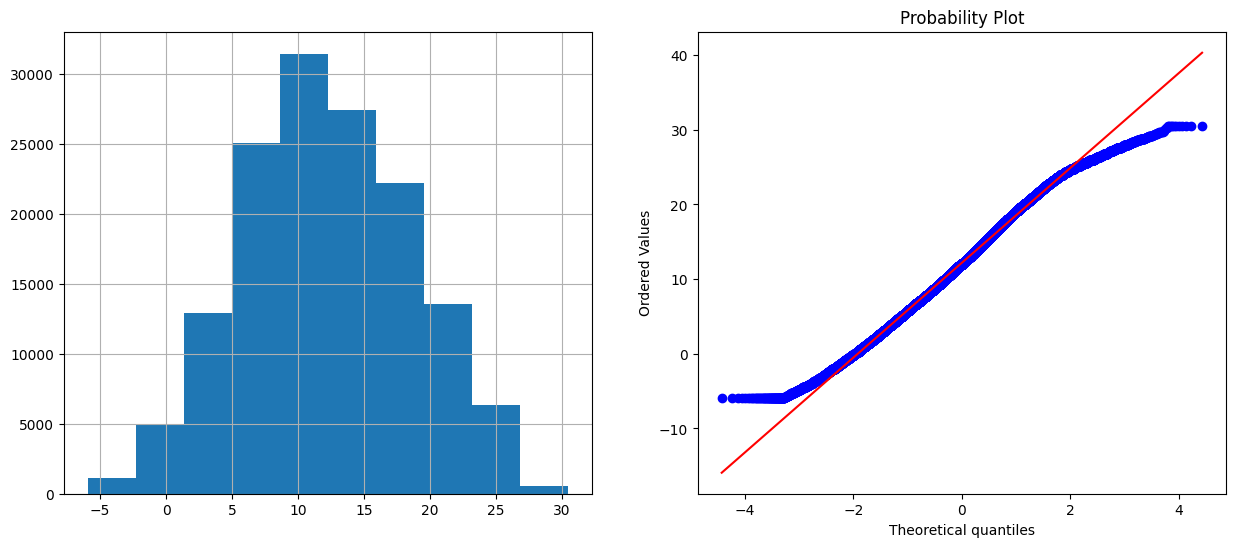

MaxTemp


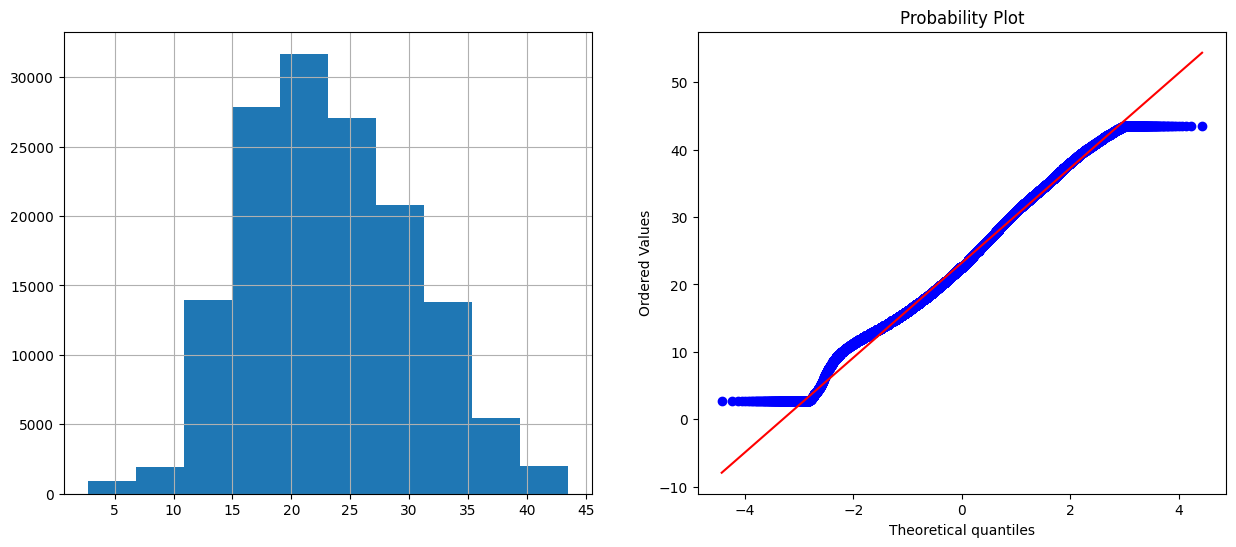

Rainfall


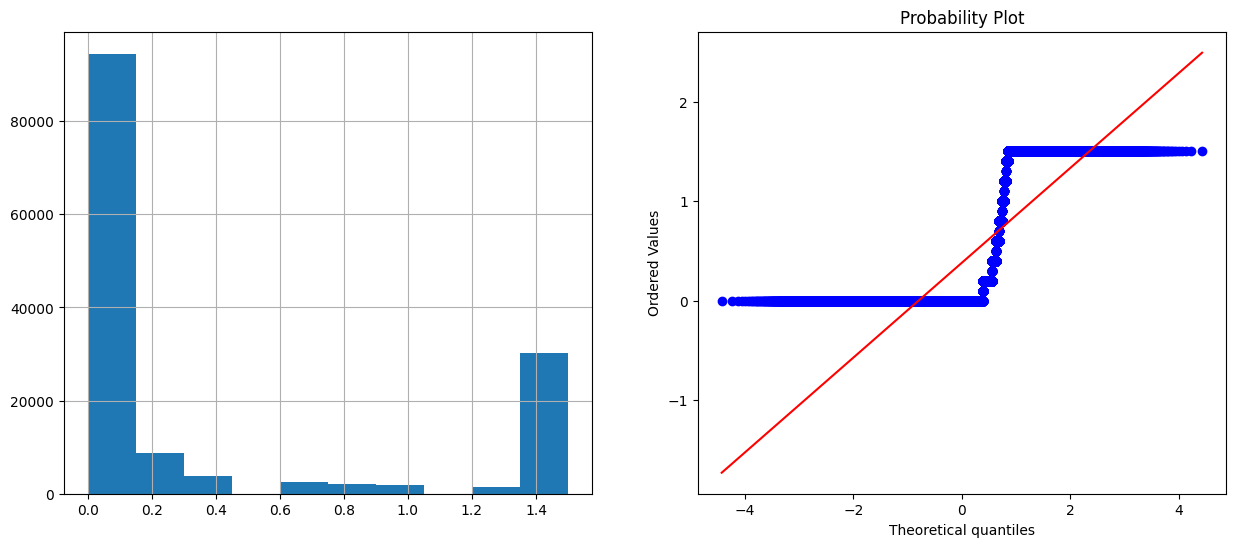

Evaporation


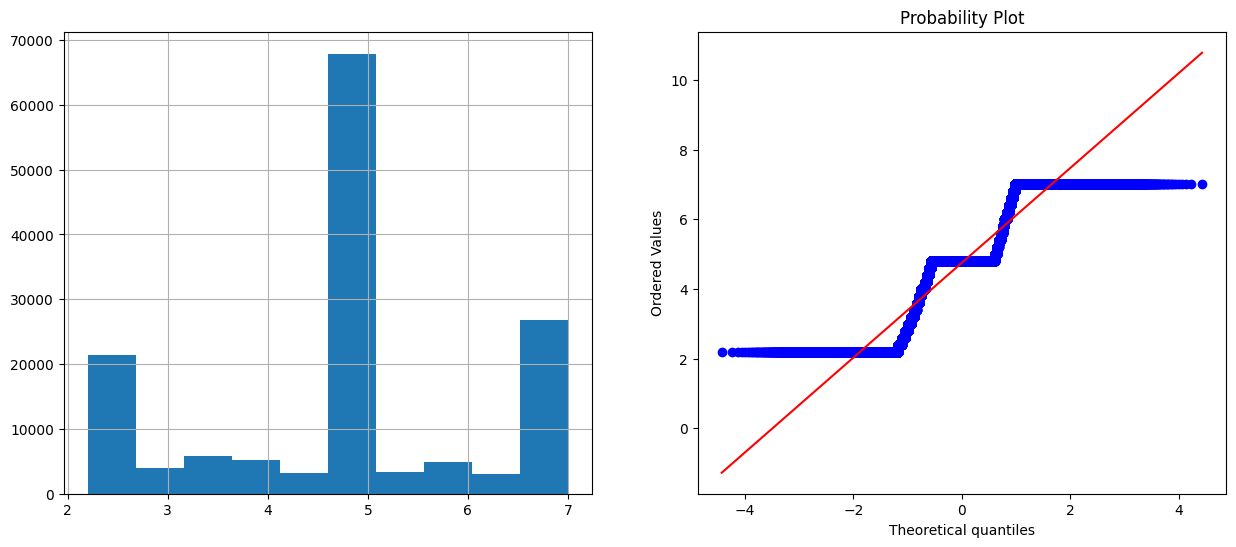

Sunshine


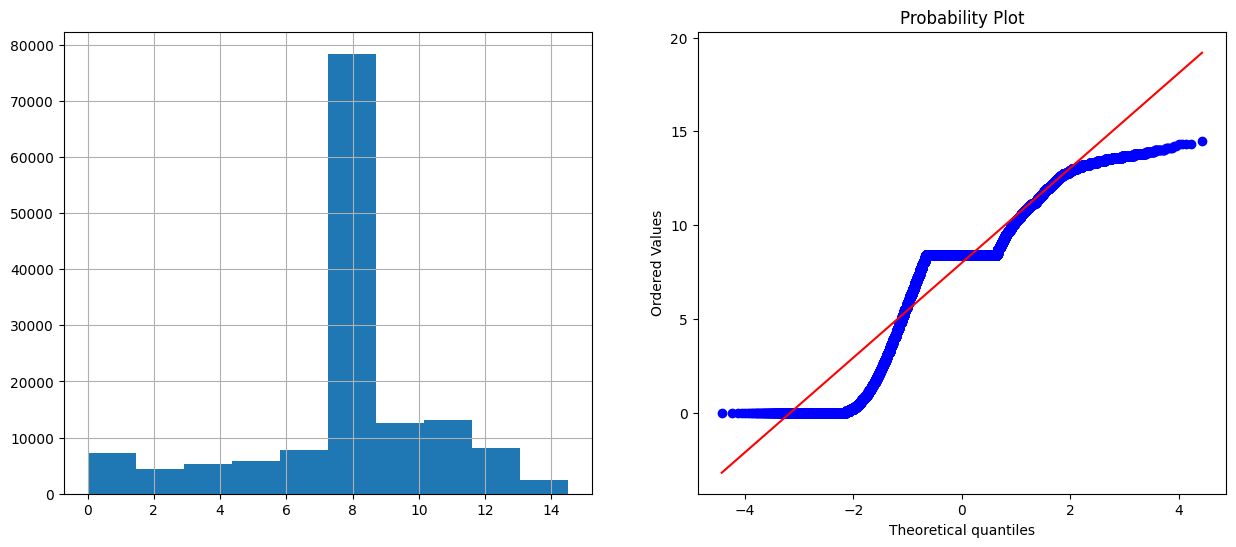

WindGustSpeed


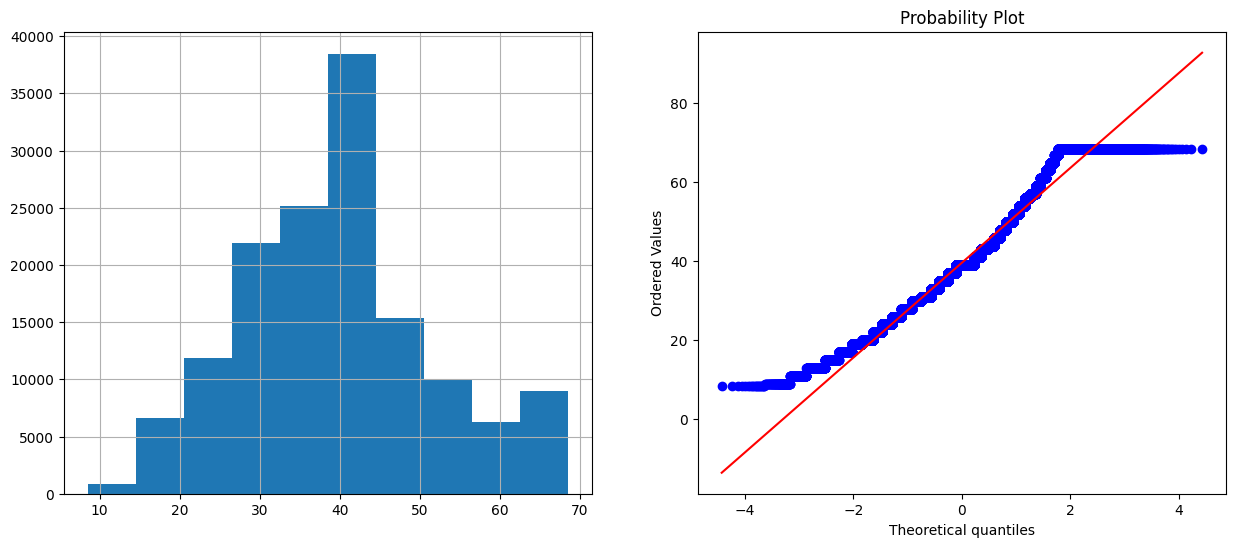

WindSpeed9am


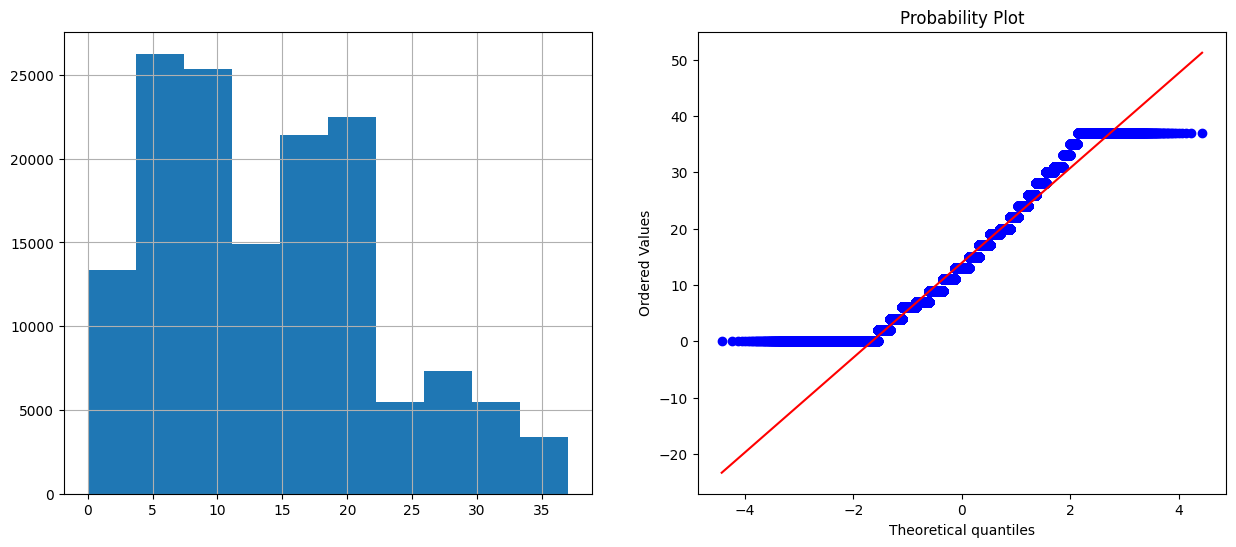

WindSpeed3pm


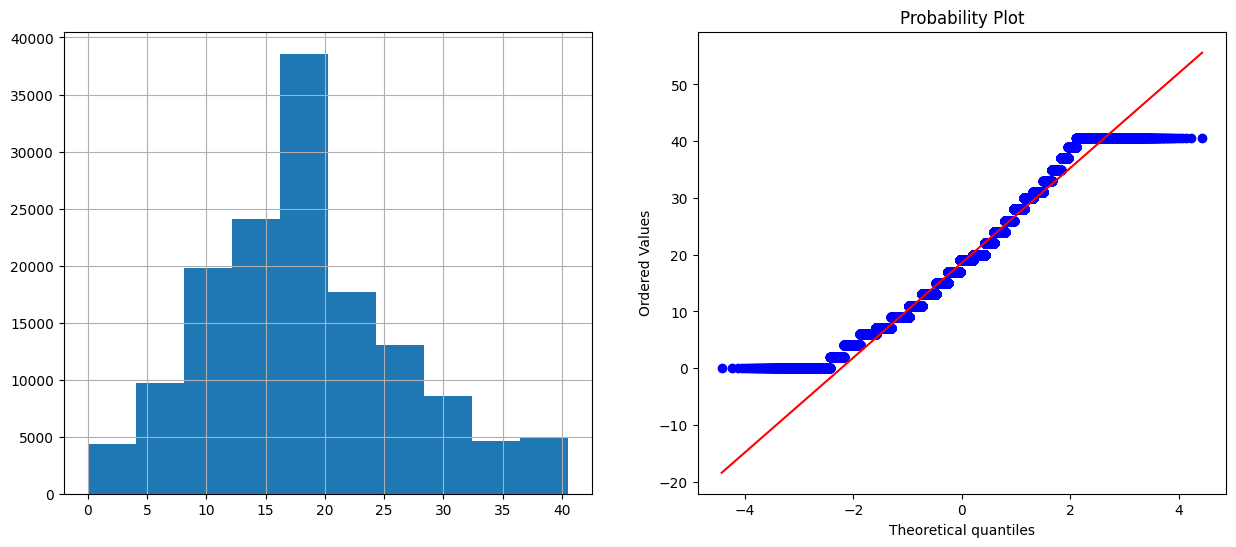

Humidity9am


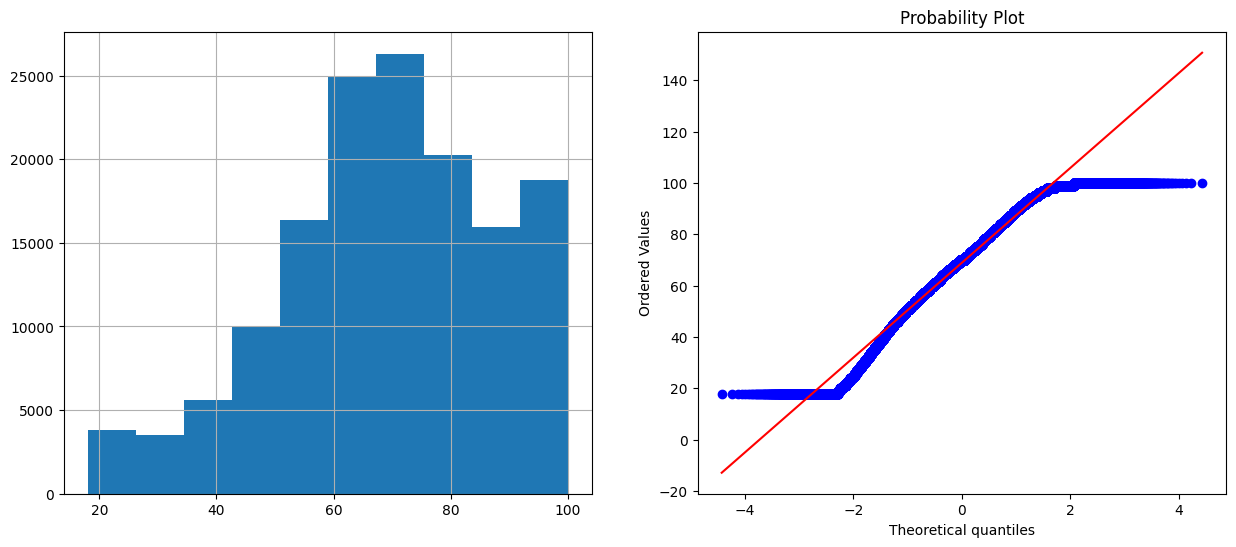

Humidity3pm


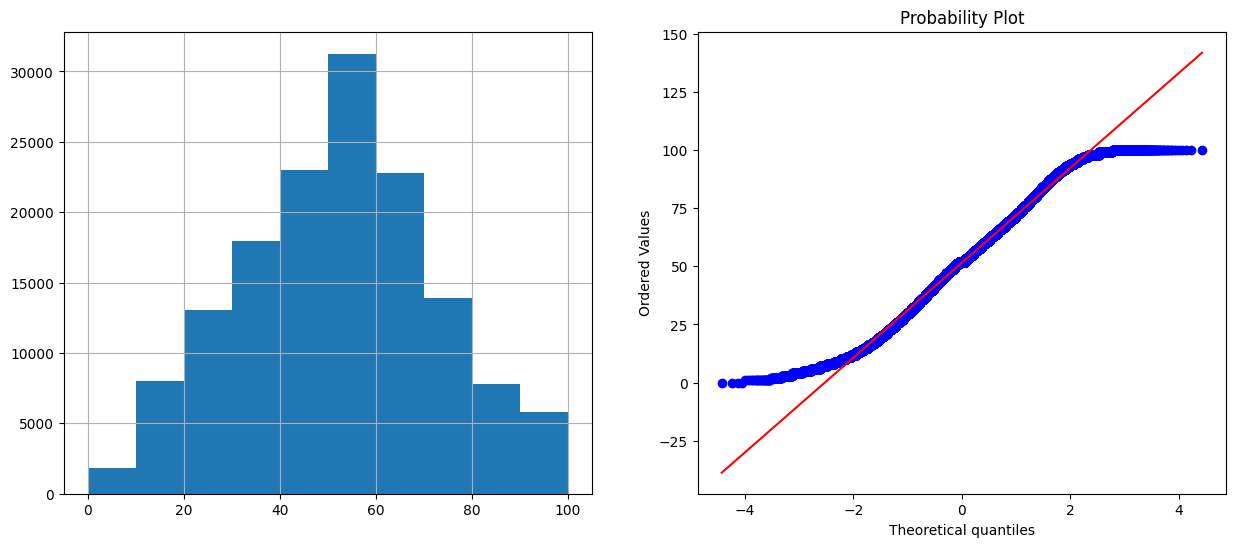

Pressure9am


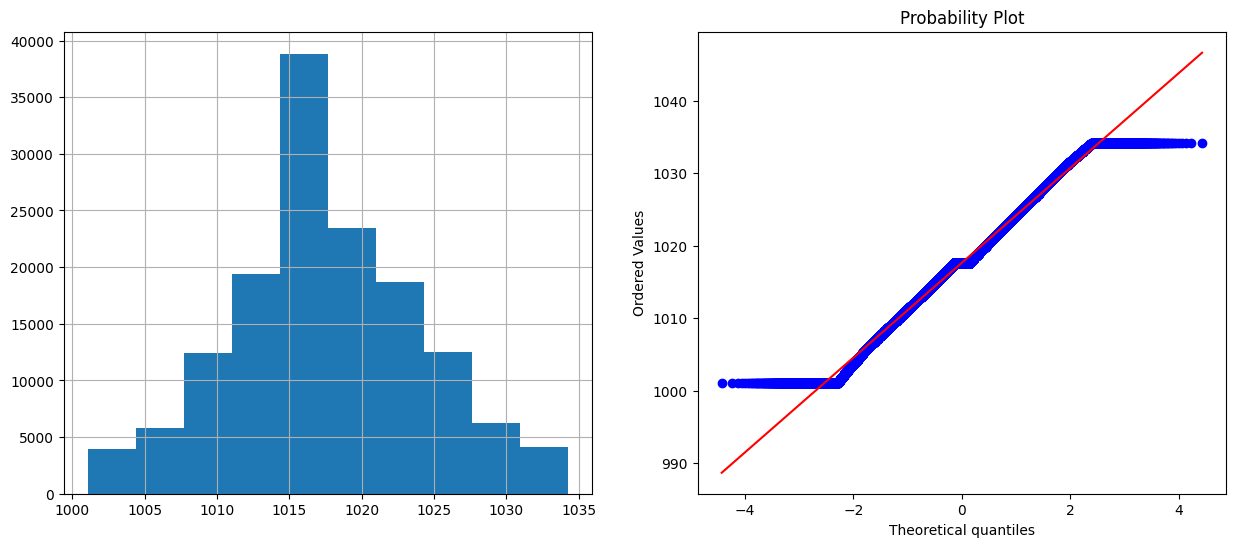

Pressure3pm


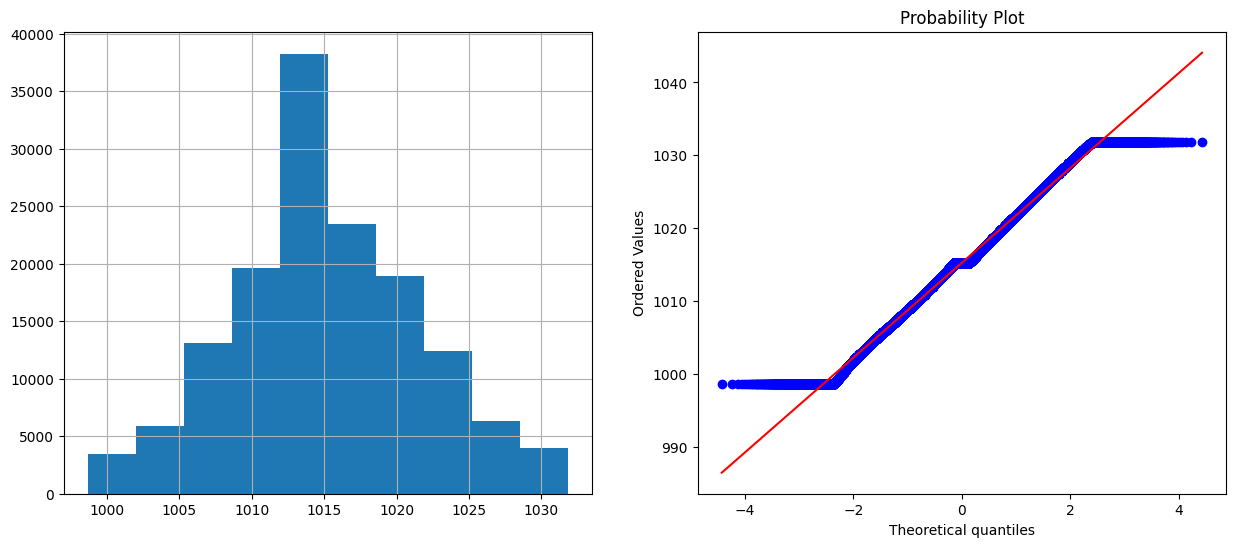

Temp9am


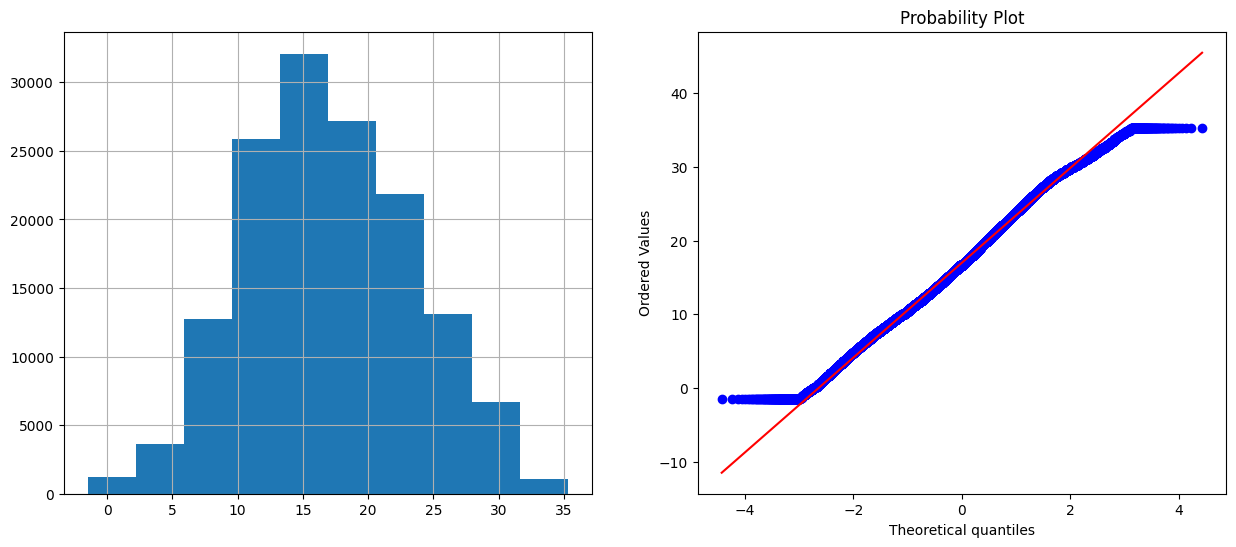

Temp3pm


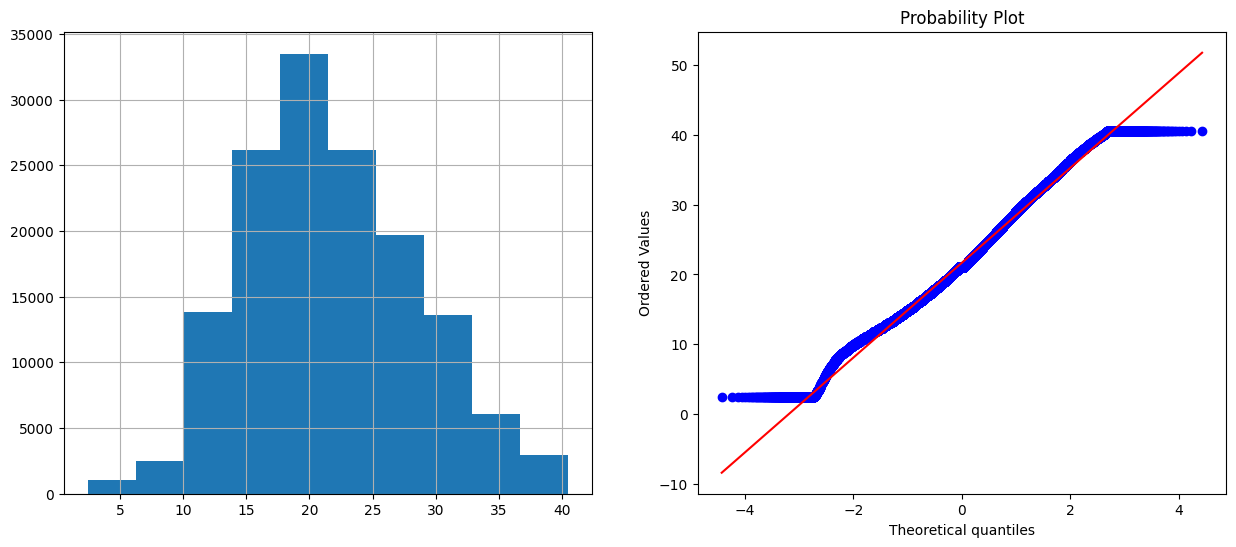

In [86]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

#applying boxcox

Evaporation


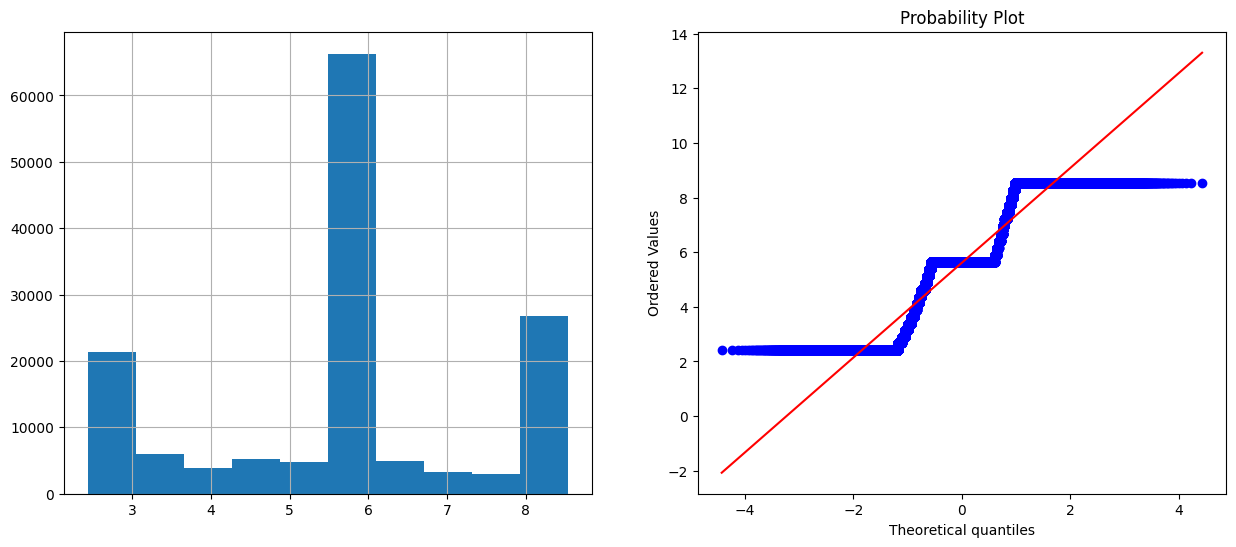

Rainfall


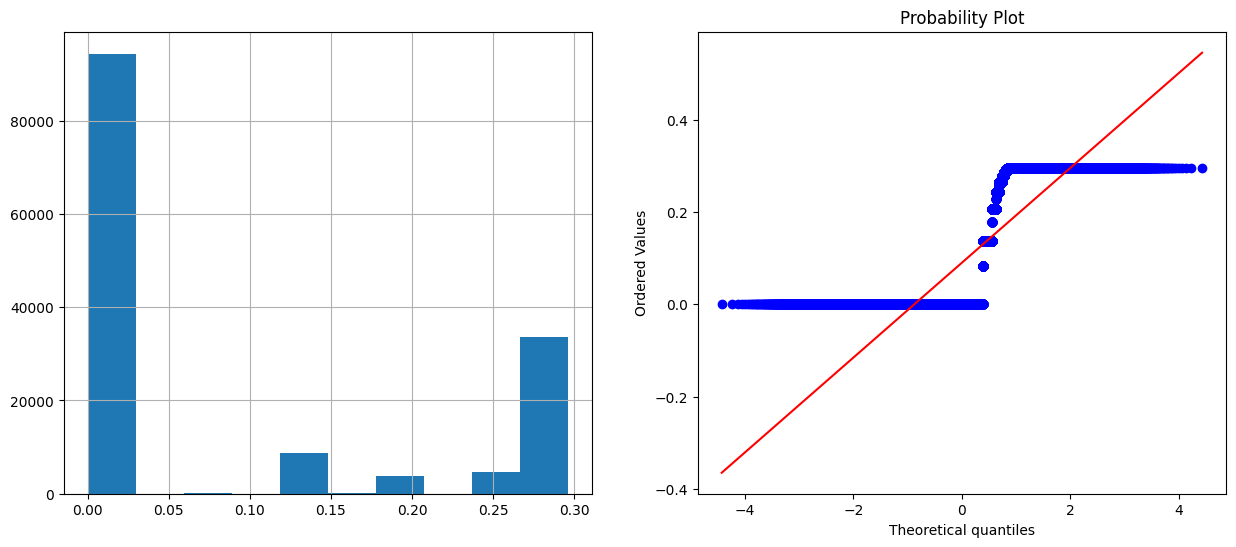

Sunshine


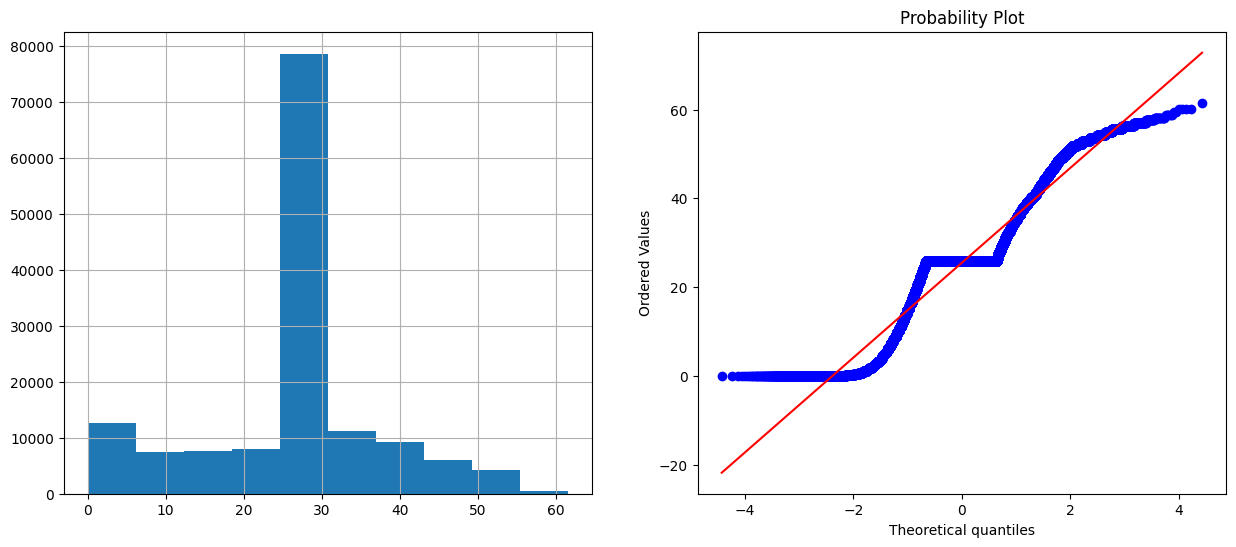

In [87]:
# prompt: transform evaporate, rainfall and sunshine column using boxcox

import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Transform 'Evaporation' column using Box-Cox
df['Evaporation'], _ = boxcox(df['Evaporation'] + 1)  # Adding 1 to handle potential zero values

# Transform 'Rainfall' column using Box-Cox
df['Rainfall'], _ = boxcox(df['Rainfall'] + 1)  # Adding 1 to handle potential zero values

# Transform 'Sunshine' column using Box-Cox
df['Sunshine'], _ = boxcox(df['Sunshine'] + 1)  # Adding 1 to handle potential zero values

# Now you can re-plot the distributions to see the effect of the transformation
for feature in ['Evaporation', 'Rainfall', 'Sunshine']:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


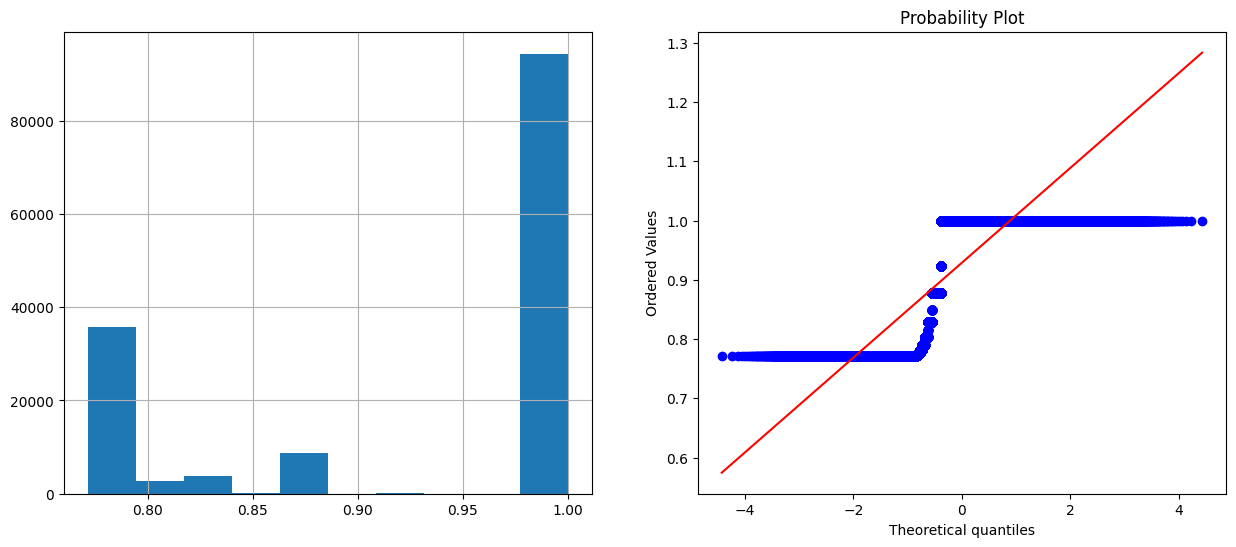

In [88]:
# prompt: apply reciprocal transfiomration on rainfall

import matplotlib.pyplot as plt
# Apply reciprocal transformation to 'Rainfall' column
df['Rainfall'] = 1 / (df['Rainfall'] + 1)  # Adding 1 to avoid division by zero

# Plot the distribution of 'Rainfall' after reciprocal transformation
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
df['Rainfall'].hist()
plt.subplot(1, 2, 2)
stats.probplot(df['Rainfall'], dist="norm", plot=plt)
plt.show()


In [89]:
# prompt: apply zcore normalisation  scaling on numerical columns except day, month and year column

from sklearn.preprocessing import StandardScaler

# Select numerical columns excluding 'day', 'month', and 'year'
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
numerical_cols = [col for col in numerical_cols if col not in ['day', 'month', 'year']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [90]:
df

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.189751 -0.045242 -1.250716      0.01526  0.042809   
1        Albury -0.752982  0.266030  0.713874      0.01526  0.042809   
2        Albury  0.111190  0.350922  0.713874      0.01526  0.042809   
3        Albury -0.470162  0.676343  0.713874      0.01526  0.042809   
4        Albury  0.833951  1.284738 -1.475132      0.01526  0.042809   
...         ...       ...       ...       ...          ...       ...   
145455    Uluru -1.475744  0.025502  0.713874      0.01526  0.042809   
145456    Uluru -1.350046  0.294328  0.713874      0.01526  0.042809   
145457    Uluru -1.067226  0.520707  0.713874      0.01526  0.042809   
145458    Uluru -0.690133  0.534856  0.713874      0.01526  0.042809   
145459    Uluru  0.425434 -0.087688  0.713874      0.01526  0.042809   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
0                W       0.357816          W        WNW  ...    -1.251138   
1              WNW       0.357816        NNW        WSW  ...    -1.143922   
2              WSW       0.522075          W        WSW  ...    -1.006073   
3               NE      -1.284777         SE          E  ...    -0.378095   
4                W       0.111427        ENE         NW  ...    -1.419620   
...            ...            ...        ...        ...  ...          ...   
145455           E      -0.709870         SE        ENE  ...     0.770646   
145456         NNW      -1.449037         SE          N  ...     0.586848   
145457           N      -0.217092         SE        WNW  ...     0.234567   
145458          SE      -0.956259        SSE          N  ...     0.188618   
145459           W      -0.052832        ESE        ESE  ...     0.403049   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  day  \
0       0.995479  0.607941 -0.013697  0.018905         No            No    1   
1       0.608406  0.607941  0.032881  0.385833         No            No    2   
2       0.608406 -1.454351  0.622868  0.224385         No            No    3   
3       0.608406  0.607941  0.172614  0.708730         No            No    4   
4       0.608406  1.020399  0.126037  1.178398         No            No    5   
...          ...       ...       ...       ...        ...           ...  ...   
145455  0.608406  0.607941 -1.069463  0.106968         No            No   21   
145456  0.608406  0.607941 -0.945255  0.415188         No            No   22   
145457  0.608406  0.607941 -0.696840  0.650022         No            No   23   
145458 -0.939884 -1.454351 -0.293165  0.635345         No            No   24   
145459  0.995479  1.020399 -0.308691 -0.113189         No            No   25   

        month  year  
0          12  2008  
1          12  2008  
2          12  2008  
3          12  2008  
4          12  2008  
...       ...   ...  
145455      6  2017  
145456      6  2017  
145457      6  2017  
145458      6  2017  
145459      6  2017  

[145460 rows x 25 columns]

#Heatmap of correlation matrix of numeric features except day, month & yea

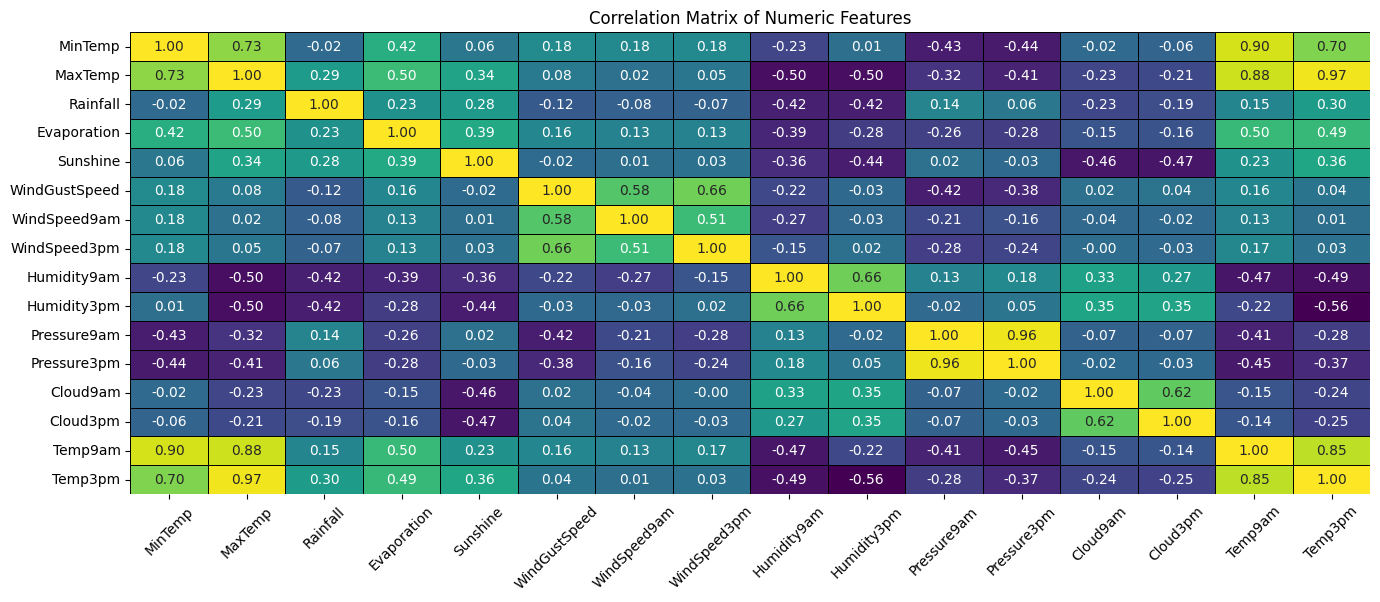

In [91]:
# Heatmap of correlation matrix of numeric features except `day, month & year`

# calculating the correlation matrix
corr_matrix = df.select_dtypes(include='float64').corr()

# defining the figure size
plt.figure(figsize=(16,6))

# plotting the heatmap
sns.heatmap(corr_matrix , cbar=False , cmap='viridis' , annot=True , fmt='.2f' , linewidths=0.5, linecolor='black')

# rotating the x axis labels
plt.xticks(rotation=45)

# setting up the title
plt.title('Correlation Matrix of Numeric Features')
plt.show()

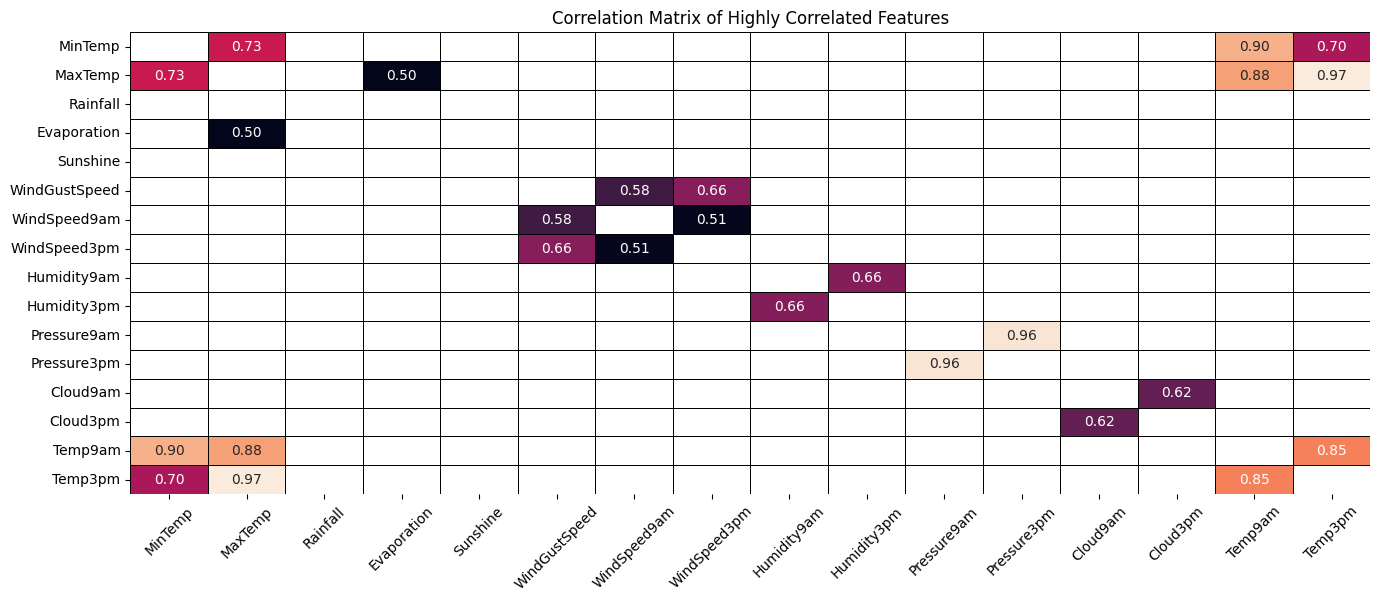

In [92]:
# correlation matrix of highly correlated features

# setting up the figure size
plt.figure(figsize=(16,6))
# calculating the correlation matrix
corr = df.select_dtypes(include='float64').corr()
# plotting the heatmap of correlation matrix which have a correlation greater than 0.5 and less than 0.99
sns.heatmap(corr[(corr>0.5) & (corr<0.99)] , cbar=False ,
             annot=True , fmt='.2f' , linewidths=0.5, linecolor='black')
# rotating the x axis labels
plt.xticks(rotation=45)
# setting up the title
plt.title('Correlation Matrix of Highly Correlated Features')
plt.show()


Observation:
Some of the columns like MinTemp & MaxTemp shows a higly positive correlation with Temp9am & Temp3pm.
As during the day time MinTemp is almost equal to Temp9am and temperature is high during afternoon which means Temp3pm is equal to MaxTemp That's why they shows higly positive correlation.
Similarly, Pressure9am and Pressure3pm shows a higly positive correlation. The reason is that atmospheric pressure is remianed almost similar of a placce.

Multicollinearity using -VIF (Variance Inflation Factor

In [93]:
# selecting the specific columns
col = df.select_dtypes(include='float64').columns

# calculating the variance inflation factor
vif = [variance_inflation_factor(df[col].values, i) for i in range(len(col))]

# creating a dataframe of vif to properly display the results
col = col
vif = pd.DataFrame({'column':col , 'vif':vif})
# rounding off the values
vif.round(2)

column    vif
0         MinTemp   8.39
1         MaxTemp  21.95
2        Rainfall   1.48
3     Evaporation   1.59
4        Sunshine   1.72
5   WindGustSpeed   2.43
6    WindSpeed9am   1.80
7    WindSpeed3pm   1.95
8     Humidity9am   3.65
9     Humidity3pm   5.00
10    Pressure9am  17.07
11    Pressure3pm  16.81
12       Cloud9am   1.83
13       Cloud3pm   1.83
14        Temp9am  18.10
15        Temp3pm  22.17


Observation:
Multicollinearity occurs when two or more predictor variables in the model are highly correlated.
Columns like MaxTemp , Temp3pm are higly correlated with each other and have high values of variance inflation factor.
Similarly, Pressure9am and Pressure3pm are higly correlated with each other and have high values of variance inflation factor.

Hence, we can able to drop one of the column among them to avoid multicollinearity.

In [94]:
# prompt: drop the temp9am, temp3pm,  pressure 3pm

df = df.drop(['Temp9am', 'Temp3pm', 'Pressure3pm'], axis=1)


In [95]:
# selecting the specific columns
col = df.select_dtypes(include='float64').columns

# calculating the variance inflation factor
vif = [variance_inflation_factor(df[col].values, i) for i in range(len(col))]

# creating a dataframe of vif to properly display the results
col = col
vif = pd.DataFrame({'column':col , 'vif':vif})
# rounding off the values
vif.round(2)

column   vif
0         MinTemp  4.57
1         MaxTemp  5.82
2        Rainfall  1.45
3     Evaporation  1.58
4        Sunshine  1.71
5   WindGustSpeed  2.40
6    WindSpeed9am  1.78
7    WindSpeed3pm  1.89
8     Humidity9am  2.41
9     Humidity3pm  3.25
10    Pressure9am  1.52
11       Cloud9am  1.81
12       Cloud3pm  1.82

In [96]:
# prompt: fidn the categorical columns

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(categorical_features)


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [97]:
# prompt: apply one hot encoding on 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'  with k-1 variables

import pandas as pd
# Apply one-hot encoding with k-1 variables
df = pd.get_dummies(df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],dtype=int, drop_first=True)
df

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.189751 -0.045242 -1.250716      0.01526  0.042809       0.357816   
1      -0.752982  0.266030  0.713874      0.01526  0.042809       0.357816   
2       0.111190  0.350922  0.713874      0.01526  0.042809       0.522075   
3      -0.470162  0.676343  0.713874      0.01526  0.042809      -1.284777   
4       0.833951  1.284738 -1.475132      0.01526  0.042809       0.111427   
...          ...       ...       ...          ...       ...            ...   
145455 -1.475744  0.025502  0.713874      0.01526  0.042809      -0.709870   
145456 -1.350046  0.294328  0.713874      0.01526  0.042809      -1.449037   
145457 -1.067226  0.520707  0.713874      0.01526  0.042809      -0.217092   
145458 -0.690133  0.534856  0.713874      0.01526  0.042809      -0.956259   
145459  0.425434 -0.087688  0.713874      0.01526  0.042809      -0.052832   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.708308      0.641629     0.109440    -1.443652  ...   
1          -1.161737      0.404729    -1.334095    -1.297105  ...   
2           0.591430      0.878529    -1.654880    -1.052860  ...   
3          -0.343592     -1.135122    -1.280631    -1.736746  ...   
4          -0.811103      0.167829     0.697547    -0.906314  ...   
...              ...           ...          ...          ...  ...   
145455     -0.109837     -0.898222    -0.959845    -1.345954  ...   
145456     -0.109837     -1.135122    -0.692524    -1.492501  ...   
145457     -0.577348     -1.135122    -0.852917    -1.345954  ...   
145458     -0.109837     -1.372022    -0.959845    -1.345954  ...   
145459      0.357674     -0.187521    -0.371738    -0.759767  ...   

        WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S WindDir3pm_SE  \
0                    0              0             0             0   
1                    0              0             0             0   
2                    0              0             0             0   
3                    0              0             0             0   
4                    0              1             0             0   
...                ...            ...           ...           ...   
145455               0              0             0             0   
145456               0              0             0             0   
145457               0              0             0             0   
145458               0              0             0             0   
145459               0              0             0             0   

       WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                   0               0              0             0   
1                   0               0              0             0   
2                   0               0              0             0   
3                   0               0              0             0   
4                   0               0              0             0   
...               ...             ...            ...           ...   
145455              0               0              0             0   
145456              0               0              0             0   
145457              0               0              0             0   
145458              0               0              0             0   
145459              0               0              0             0   

        WindDir3pm_WNW  WindDir3pm_WSW  
0                    1               0  
1                    0               1  
2                    0               1  
3                    0               0  
4                    0               0  
...                ...             ...  
145455               0               0  
145456               0               0  
145457               1               0  
145458               0               0  
145459               0               0  

[145460 rows x 111 columns]

In [98]:
# prompt: create label encoding for raintoday with k-1

le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])

In [99]:
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])

In [100]:
# prompt: print the column raintoday and rain tommorow

print(df['RainToday'])
print(df['RainTomorrow'])


0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainToday, Length: 145460, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64


#Checking the distribution of RainTomorrow

In [101]:

# checking the value counts of `RainTomorrow`
df['RainTomorrow'].value_counts()

RainTomorrow
0    113583
1     31877
Name: count, dtype: int64

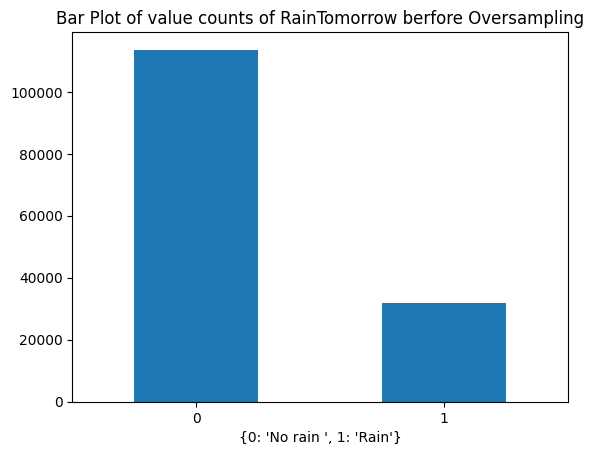

In [102]:
# checking the count plot of unique values of `RainTomorrow`
df['RainTomorrow'].value_counts().plot(kind='bar')
# setting up the title
plt.title('Bar Plot of value counts of RainTomorrow berfore Oversampling')
# rotating the x axis labels
plt.xticks(rotation=360)
plt.xlabel({0: 'No rain ', 1:'Rain'})
plt.show()


Observations:¶
Notice how imbalanced is our original dataset! Most of the enteries are with no rain. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most of time there is no rain. But we don't want our model to assume, we want our model to detect patterns that give signs of rain!

The target variable has class imbalance
The value count of RainTomorrow is 0 which means No is 57161 whereas, the count of RainTomorrow = 1 means Yes has only 15705 records.

Hence, to sort this issue we can use oversampling technique SMOTE.

In [103]:
# definig the X and y

X_resample = df.drop('RainTomorrow' , axis=1)

y_resample = df['RainTomorrow']

# splitting the data into train and test
X_train_resample , X_test_resample , y_train_resample , y_test_resample = train_test_split(X_resample , y_resample , test_size=0.2 , random_state=42)

# calling SMOTE
smote = SMOTE(random_state=42)

# applying SMOTE on training data
X_train_resample , y_train_resample = smote.fit_resample(X_train_resample , y_train_resample)

<ipython-input-104-c577bfb41c51>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




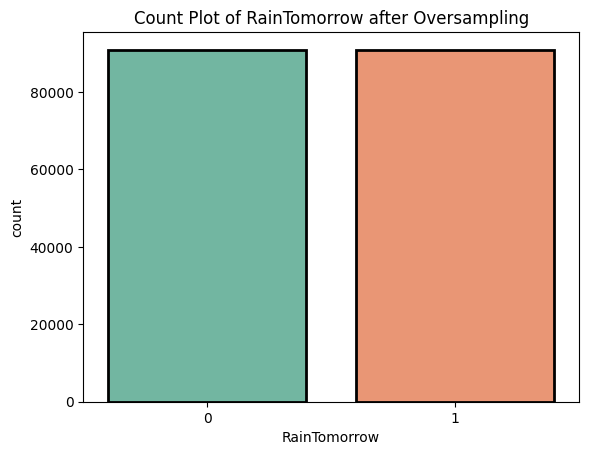

In [104]:
# plotting the count plot
sns.countplot(x=y_train_resample , palette='Set2' , edgecolor='black' , linewidth=2 )
plt.title('Count Plot of RainTomorrow after Oversampling')
plt.show()

In [105]:
before_sampling = X_resample.shape[0]
print (f"Number of rows before SMOTE: {before_sampling} \n")

after_sampling = X_train_resample.shape[0] + X_test_resample.shape[0]

print (f"Number of rows after SMOTE: {after_sampling} \n")

increase_in_rows =  after_sampling - before_sampling
print(f"Increase in number of rows after SMOTE: {increase_in_rows}")

Number of rows before SMOTE: 145460 

Number of rows after SMOTE: 210914 

Increase in number of rows after SMOTE: 65454


In [106]:
# prompt: now check  the vale count in rain tomorrow after smote

# checking the value counts of `RainTomorrow` after SMOTE
y_train_resample.value_counts()


RainTomorrow
1    90911
0    90911
Name: count, dtype: int64

In [107]:
X1 = X_train_resample
X2 = X_test_resample

# concatenating the independent testing and training data
X = pd.concat([X1 , X2] , axis=0)

# concatenating the dependent testing and training data
y1 = y_train_resample
y2 = y_test_resample

y = pd.concat([y1 , y2] , axis=0)

In [108]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#logistic regression

In [109]:
# calling the logistic regression
model = LogisticRegression()

# applying logistic regression
model.fit(X_train, y_train)

# predicting values
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [110]:
# checking accuracy score
print('Accuracy Score :', accuracy_score(y_test, y_pred) , '\n')

# checking recall score
print('Recall Score :',recall_score(y_test, y_pred) , '\n')

# checking precision score
print('Precision Score :',precision_score(y_test, y_pred) , '\n')

# checking f1 score
print('F1 Score :',f1_score(y_test, y_pred) , '\n')

# checking classification report
print('Classification Report :', '\n',classification_report(y_test, y_pred))

Accuracy Score : 0.8395799255624303 

Recall Score : 0.803505394863482 

Precision Score : 0.8459733333333334 

F1 Score : 0.8241926684159933 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     22442
           1       0.85      0.80      0.82     19741

    accuracy                           0.84     42183
   macro avg       0.84      0.84      0.84     42183
weighted avg       0.84      0.84      0.84     42183



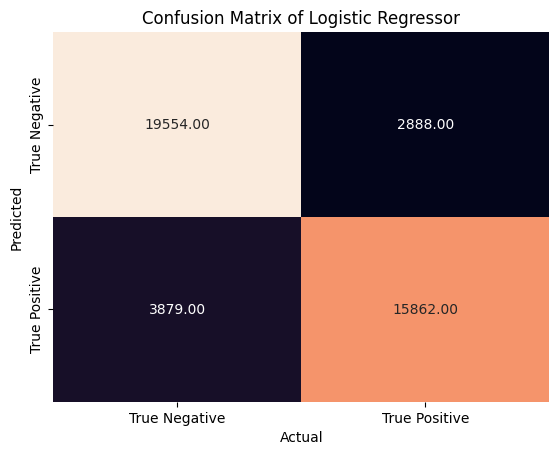

In [111]:
# confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred) , annot=True , fmt='.2f' , xticklabels=['True Negative' , 'True Positive'] ,
            yticklabels=['True Negative' , 'True Positive'] , cbar=False)

# setting up the x and y label
plt.xlabel('Actual')
plt.ylabel('Predicted')

# setting up the title
plt.title('Confusion Matrix of Logistic Regressor')

plt.show()

In [114]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [115]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1604


In [116]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# values of true negative , true positive , false negative , false positive
print(f'True Negative: {cm[0,0]} \n')

print(f'True Positive: {cm[1,1]} \n')

print(f'False Positive: {cm[1,0]} \n')

print(f'False Negative: {cm[0,1]} \n')

True Negative: 19554 

True Positive: 15862 

False Positive: 3879 

False Negative: 2888 



In [117]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.8713


In [118]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8345


In [119]:
#Training and Testing Accuracy
# train accuracy

y_pred_train = model.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

0.840823559393354


In [121]:
# test accuracy

y_pred_test = model.predict(X_test)

print(accuracy_score(y_test, y_pred_test))

0.8395799255624303


AUC-ROC Score: 0.92


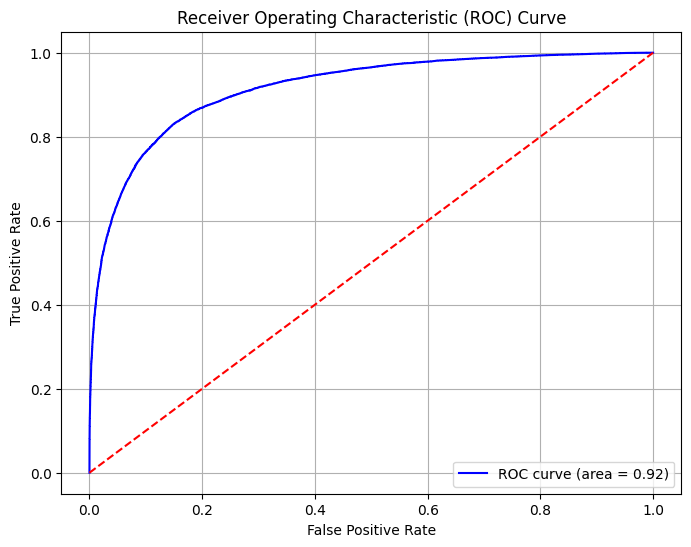

In [124]:
y_prob = model.predict_proba(X_test)[:, 1]
# Import the necessary function
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC Score: {auc:.2f}')

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (no skill classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [125]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Cross validated ROC AUC : 0.8793


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [127]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

NameError: name 'scores' is not defined

In [128]:
# prompt: apply k fold cross validation

from sklearn.model_selection import cross_val_score

# Assuming 'model' is your fitted LogisticRegression model
# and 'X' and 'y' are your full dataset (after SMOTE)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy')

# Print the scores for each fold
print("Cross-validation scores:", scores)

# Print the average score
print("Average cross-validation score:", scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Cross-validation scores: [0.80104898 0.79985776 0.7890713  0.80110235 0.79025662]
Average cross-validation score: 0.796267403253825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = ['accuracy','precision','recall'],
                           cv = 10,
                           refit='accuracy',  # Specify which metric to use for refitting
                           verbose=0)

grid_search.fit(X_train, y_train)

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

#KNN

In [146]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [147]:
pred=knn.predict(X_test)

In [148]:
print(confusion_matrix(y_test,pred))

#

[[17460  4982]
 [  875 18866]]


In [149]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86     22442
           1       0.79      0.96      0.87     19741

    accuracy                           0.86     42183
   macro avg       0.87      0.87      0.86     42183
weighted avg       0.88      0.86      0.86     42183



In [144]:
from sklearn import metrics
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(40)
for i in range(1,41):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)


mean_acc

array([0.82772681, 0.8611526 , 0.78982054, 0.8215869 , 0.77289429,
       0.79930304, 0.76082782, 0.78282721, 0.75423749, 0.77301283,
       0.74859541, 0.76632767, 0.74608255, 0.76142048, 0.74409122,
       0.75679776, 0.74276367, 0.7554228 , 0.74127018, 0.75250693,
       0.73892326, 0.75004149, 0.73721641, 0.74745751, 0.73702676,
       0.74681744, 0.73624446, 0.74518171, 0.73498803, 0.74354598,
       0.73415831, 0.74238437, 0.73403978, 0.74127018, 0.73399237,
       0.74129389, 0.73472726, 0.7417206 , 0.73418202, 0.74217102])

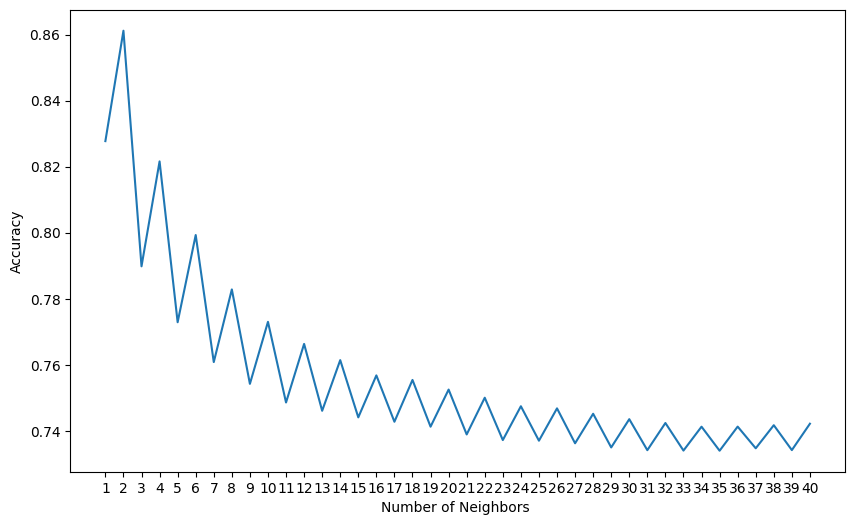

In [145]:
loc = np.arange(1,41,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,41), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [142]:
from sklearn import metrics
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(10)
for i in range(11,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-11] = metrics.accuracy_score(y_test, yhat)


mean_acc

array([0.74859541, 0.76632767, 0.74608255, 0.76142048, 0.74409122,
       0.75679776, 0.74276367, 0.7554228 , 0.74127018, 0.75250693])

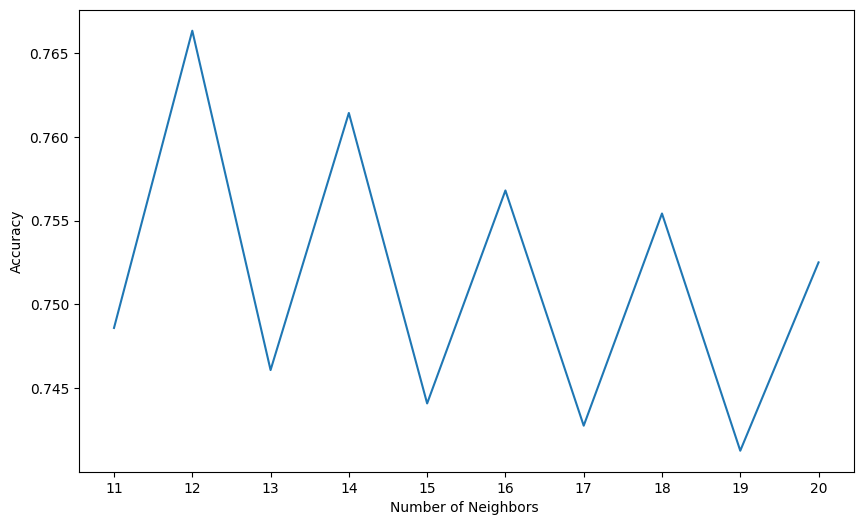

In [143]:
loc = np.arange(11,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(11,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()